<a href="https://colab.research.google.com/github/ganeshsingh9325/Supervised--ML--Classification/blob/main/Supervised_ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Cardiovascular Risk Prediction**



##### **Project Type**     -    Classification
##### **Contribution**     -    Individual
##### **Name**             -    Ganesh Singh

# **Project Summary -**

The Cardiovascular Risk Prediction dataset includes data on 3,390 patients, featuring 16 predictor variables and 1 target variable. Each variable represents a potential risk factor, including demographic, behavioral, and medical factors. Our objective is to predict the likelihood of developing coronary heart disease (CHD) over a 10-year period.

The medical community has been exploring the use of machine learning techniques to create diagnostic tools, and our project aims to provide an overview of this process. Specifically, we will be developing a diagnostic tool that predicts a patient's 10-year risk of developing coronary heart disease (CHD) based on their current health status. We will employ various machine learning techniques to accomplish this goal.

The initial step of the project was to gather and preprocess the data by addressing missing values and outliers. We also performed data type conversion to facilitate visualization. Subsequently, we conducted a thorough exploratory data analysis by creating various plots such as univariate and bivariate  graphs. This approach allowed us to extract valuable insights that informed our subsequent decisions regarding the machine learning model pipeline.

After completing initial data exploration, we performed feature engineering and data preprocessing to extract new features such as pulse_pressure and postpandrial_glucose_diabetes. These new features were derived from the existing ones that were not directly related to the target variable, tenYearCHD. We also addressed the issue of multicollinearity among independent variables by calculating the variance inflation factor (VIF) and removing the features with high VIF scores. This process helped us to identify the most important features for our model and improved its overall performance. Outliers were not removed from the dataset as they can contain valuable information that is important for predicting the 10-year risk of developing coronary heart disease. Additionally, we found that some of the features were categorical, which cannot be understood by machine learning models. To address this issue, we used binary label encoding to convert these categorical features into numerical values.

The dataset we worked on was highly imbalanced as the distribution of the target variable, TenYearCHD, showed that only 15% of individuals were classified as having a high risk of developing CHD. To address this issue, we used the SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset by generating synthetic samples of the minority class.

After splitting and standardizing the data, we proceeded to apply various machine learning algorithms. The algorithms we experimented with included Logistic Regression, Random Forest, K-Nearest Neighbors, XGBoost, and Support Vector Machine.

The model evaluation process involved comparing the performance of different algorithms using metrics such as confusion matrix, recall, f1 score, and accuracy. Since this was healthcare data, we placed greater emphasis on recall to reduce the number of false negative cases, which is a critical objective. Additionally, we considered f1 score as an important metric for balancing precision and recall. Finally, we also evaluated the overall accuracy of the models.After tinkering with various machine learning algorithms and carefully tuning their hyperparameters, we finally found our diamond in the rough - the XGBoost model. This magnificent model achieved an impressive accuracy of 89%, with an F1_score of 88%. Not only that, but its precision was a staggering 91%, ensuring that we could trust its predictions with utmost confidence. And let's not forget its solid recall of 85%, making sure we catch as many true positives as possible. All in all, it was a clear winner among all models.

Throughout our journey of developing a machine learning model for predicting cardiovascular risk, we encountered several hurdles and setbacks. However, by applying a combination of data processing techniques, machine learning algorithms, and model evaluation methods, we overcame these challenges and ultimately achieved success. Our final model has the ability to accurately predict the risk of developing coronary heart disease in a patient, making it a valuable tool in the field of healthcare.









# **GitHub Link -**

https://github.com/ganeshsingh9325

# **Problem Statement**


The dataset is from ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patients has a 10-year risk of  coronary heart disease(CHD). The dataset provides the patient's information . It includes  3390 records and 16 attributes. Each attribute is a potental risk factor having demographic, behavioral, and medical attributes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline


# Machine learning model selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


# For feature engineering and selection
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score


# Importing classification metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,f1_score,roc_auc_score
import sklearn.metrics as metrtics


# importing the missingo library, which enables us to see the values that are missing.
import missingno as msno

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
## Creating path for the dataset
df= '/content/data_cardiovascular_risk.csv'
CHD_df= pd.read_csv(df)

### Dataset First View

In [ ]:
# Dataset First Look
# Viewing the dataset, top 5 data records
CHD_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Viewing the dataset, last 5 data records
CHD_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
CHD_df.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info
CHD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
CHD_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
CHD_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# Total count of missing values
CHD_df.isnull().sum().sum()

510

In [ ]:
# Percentage Contribution of Missing Values in the dataset.
CHD_df.isnull().sum()/len(CHD_df)*100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

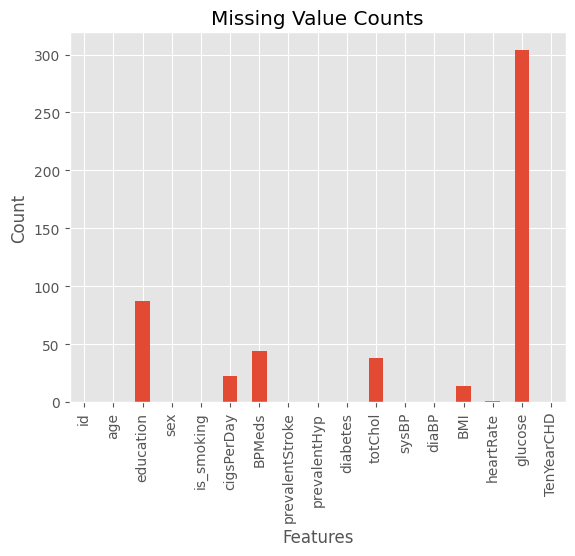

In [ ]:
# Visualizing the missing values
null_counts= CHD_df.isnull().sum()
null_counts.plot.bar()
plt.title('Missing Value Counts')
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()


### What did you know about your dataset?

The given Dataset has 3390 rows and 17 columns with no duplicate values. There are total 510 missing values in the dataset and the percentage contribution of the features in the missing values are as follows-



* *Glucose*- 8.96%
* *Education*- 2.57%
* *BPMeds*- 1.29%   
* *TotChol*- 1.12%
* *CigsPerDay*- 0.65%
* *BMI*- 0.41%
* *HeartRate*- 0.029%








These are the seven features which are contributing in missing values.

Feature *Sex* and *is_smoking* are in object datatype and rest features are in numeric datatype.









## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
CHD_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
# It gives the Statistical Information about the numeric column.
CHD_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

There are 3390 rows and 17 columns/features in the dataset whose description are as folows-

**Demographic-**


* *Id*- Unique id of a patient.
* *Age*- Age of the patient.
* *Sex*- Male or female ("M" or "F")
* *Education*- The level of education of the patient (categorical values - 1,2,3,4)

**Behavioural-**

* *is_smoking*- Whether or not the patient is a current smoker ("YES" or "NO")
* *Cigsperday*- The number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have as many as number of cigarettes, even half a cigarette.)

**Medical(History)-**

* *BP Meds*- Whether or not the patient was on blood pressure medication (Nominal)
* *Prevalent Stroke*- Whether or not the patient had previously had a stroke (Nominal)
* *Prevalent Hyp*- Whether or not the patient had hypertension (Nominal)
* *Diabetes*- Whether or not the patient had diabetes (Nominal)

**Medical(Current)-**

* *Tot Chol*- Total cholesterol level (Continuous)
* *Sys BP*- Systolic blood pressure (Continuous)
* *Dia BP*- Diastolic blood pressure (Continuous)
* *BMI*- Body Mass Index (Continuous)
* *Heart Rate*- Heart rate (Continuous)
* *Glucose*- Glucose level (Continuous)

**Predict variable (Desired Label)-**

* *TenYearCHD*- 10 Year Risk of coronary heart disease CHD(binary: “0”, means “No”, “1”, means “Yes”)





















### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
CHD_df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Converting 'Id' feature to Dataframe Index as it is not relevant to our target.
CHD_df.set_index('id',inplace=True)

In [ ]:
# Checking the dataframe with Index 'Id'
CHD_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Renaming the columns for our simplicity
CHD_df.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [ ]:
# Viewing the columns with renamed ones
CHD_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose',
       'ten_year_chd'],
      dtype='object')

**Handling Missing/Null Values**

As, we know there are seven features that are contributing for missing values,amongst them five features('heart_Rate', 'glucose', 'bmi', 'cigs_per_day', 'total_cholesterol') are numerical features and the rest two features('education', 'bp_meds') are categorical features.



* **Numerical Features** having missing values are replaced with the **median** as the median are not susceptible to outliers.
* **Categorical Features** having missing values are replaced with **mode**.



In [ ]:
# Handling missing values of numerical features.
CHD_df['cigs_per_day'].fillna(CHD_df['cigs_per_day'].median(), inplace = True)
CHD_df['total_cholesterol'].fillna(CHD_df['total_cholesterol'].median(), inplace = True)
CHD_df['bmi'].fillna(CHD_df['bmi'].median(), inplace = True)
CHD_df['heart_rate'].fillna(CHD_df['heart_rate'].median(), inplace = True)
CHD_df['glucose'].fillna(CHD_df['glucose'].median(), inplace = True)

# Handling missing values of categorical features.
CHD_df['education'].fillna(float(CHD_df['education'].mode()), inplace = True)
CHD_df['bp_meds'].fillna(float(CHD_df['bp_meds'].mode()), inplace = True)

In [ ]:
## Crossveriying the missing values after handling it.
CHD_df.isnull().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

### What all manipulations have you done and insights you found?

There are 3390 rows and 17 columns initially, but the feature 'id' had no relevancy with target lable so it is converted as dataframe index and the new dataframe contains 3390 rows and 16 rows.I have also modify the names of some of the features for the ease of usage. There are total 510 missing values in which both numerical and categorical features contributed. Missing values in numerical features are replaced with **median** and the feature '*glucose*' has maximum missing values(i.e. 304). Missing Values in categorical features are replaced with **mode**.There must be outliers in numerical features which will be handled in data pre-processing for tuned and accurate model implementation.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##*Univariate Analysis*

Segregating the columns into categorical and continous features as well as target variable

In [ ]:
target_variable = 'ten_year_chd'

In [ ]:
continous_features= ['age', 'cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']
categorical_features=  ['education', 'sex', 'is_smoking', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'ten_year_chd']

#### Chart - 1 Pie Chart and Bar Plot of Dependent Variable 'ten_year_chd'

In [ ]:
# Chart - 1 visualization code
##  checking the distribution of Target Variable
CHD_df.ten_year_chd.value_counts()

0    2879
1     511
Name: ten_year_chd, dtype: int64

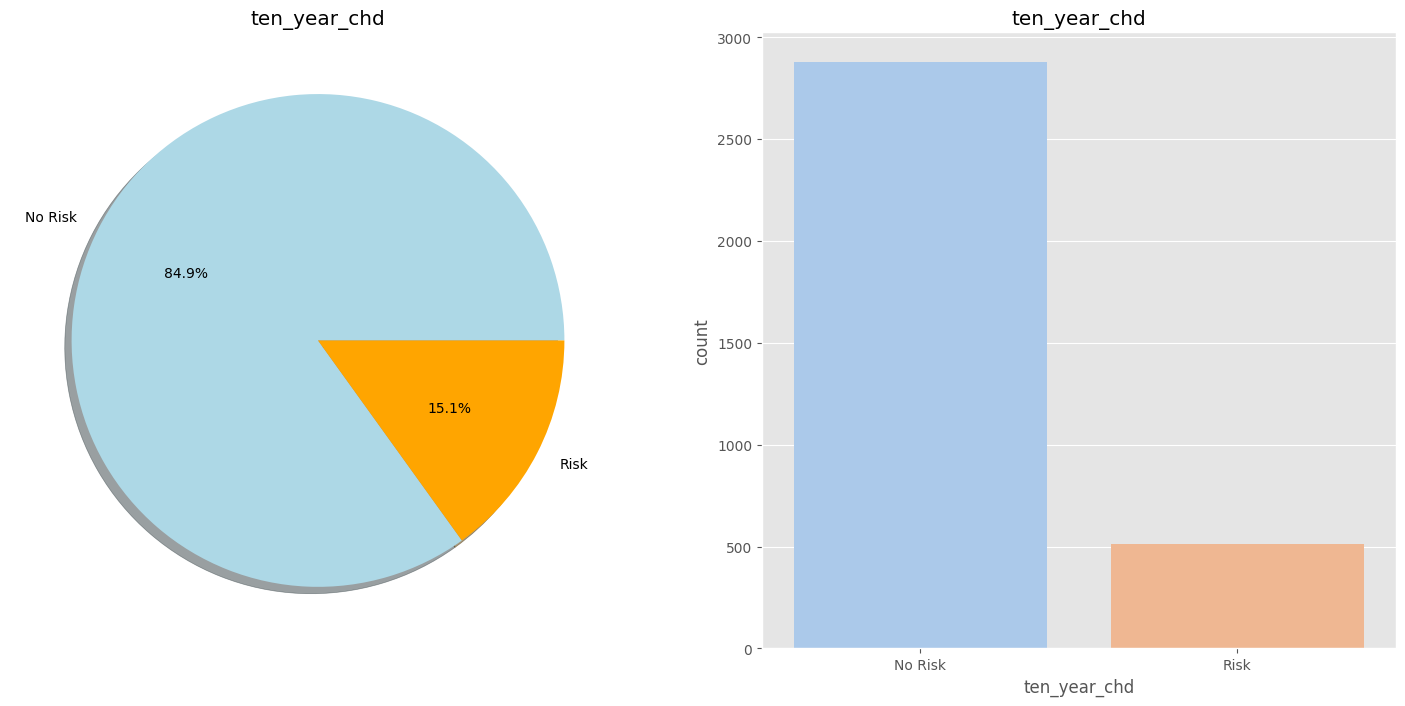

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
labels = ['No Risk', 'Risk']
CHD_df['ten_year_chd'].value_counts().plot.pie(labels=labels,autopct='%1.1f%%', ax=ax[0], shadow=True, colors=['lightblue', 'orange'])
ax[0].set_title('ten_year_chd')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
sns.countplot(x='ten_year_chd', data=CHD_df, ax=ax[1],palette = "pastel")
ax[1].set_title('ten_year_chd')
ax[1].set_xticklabels(['No Risk', 'Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is used to show the proportion or percentage distribution of different categories within a whole. It represents each category as a slice of a pie, with the size of each slice proportional to the percentage it represents. Pie charts are especially effective when you have a small number of categories (typically less than six) and want to emphasize the relative sizes of each category.

 Bar chart (or count plot) is used to compare the frequencies or counts of different categories or groups. It represents each category as a separate bar, with the height or length of each bar representing the count or frequency of that category. Bar charts are commonly used to visualize the distribution of categorical variables and compare the counts between different categories.

##### 2. What is/are the insight(s) found from the chart?

From the above charts we come to know that 15.1% that is 511 out of 3390 are classified as positive for 10 year CHD whereas the remaining 84.9% that is 2879 out of 3390 are classified as negative for 10 year CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above plots it is clear that there is is a significant class imbalance with a high proportion of individuals having normal results.This can lead to potential issues for the model's performance, as it may become biased towards predicting "No Risk" due to the overrepresentation of these entries. In this situation it will fail to address high CHD prevalence that could have negative implications for public health and healthcare businesses.

#### Chart - 2 Histogram,KDE and Box Plot of Continous Independent Variable.

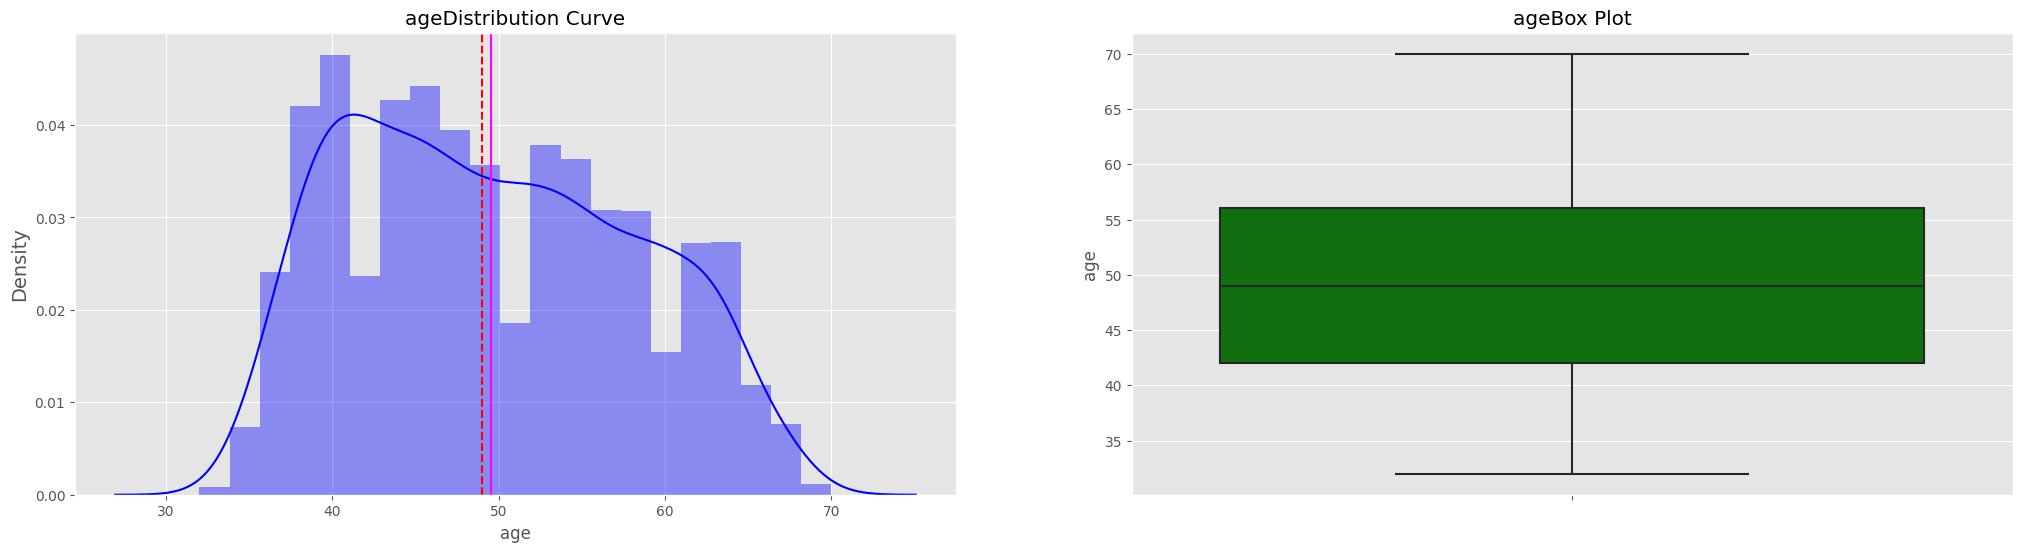

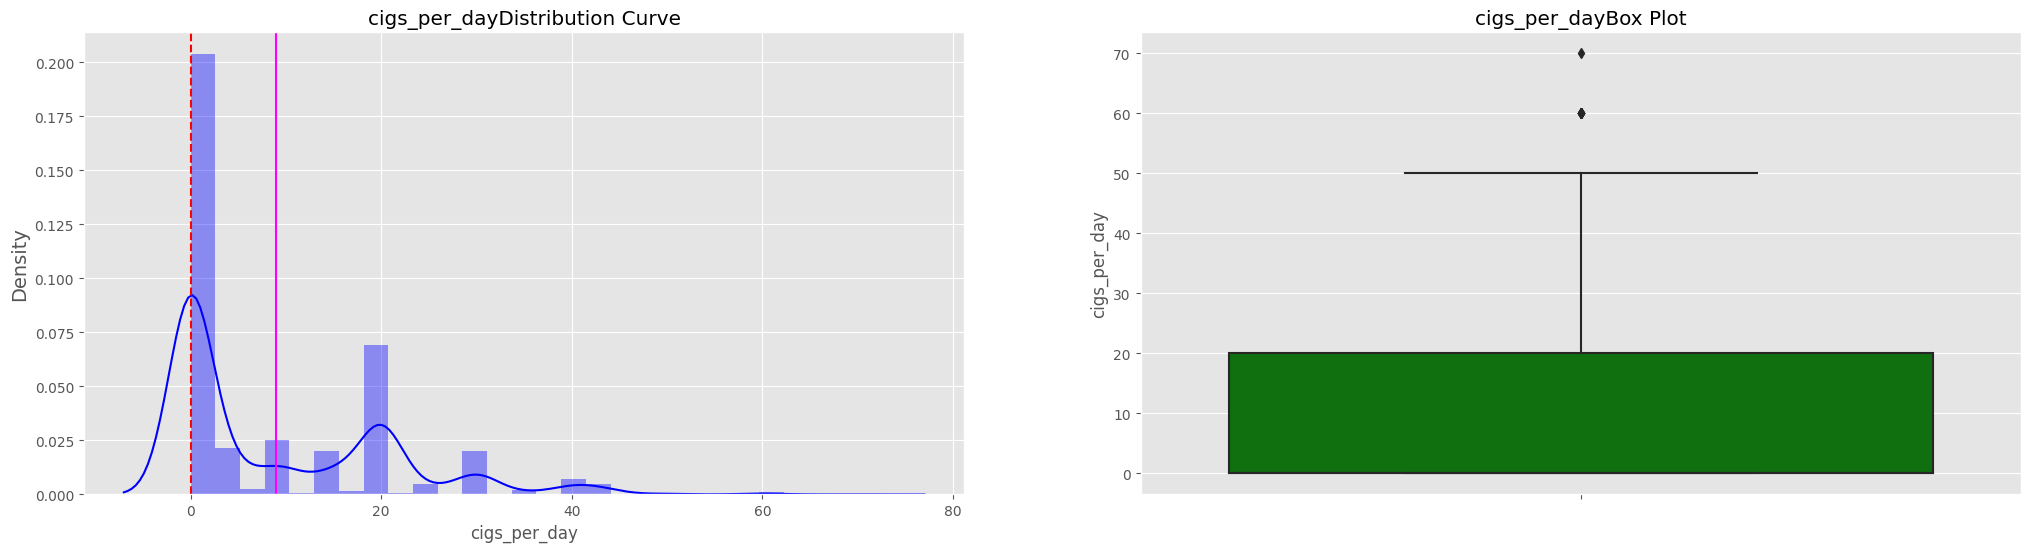

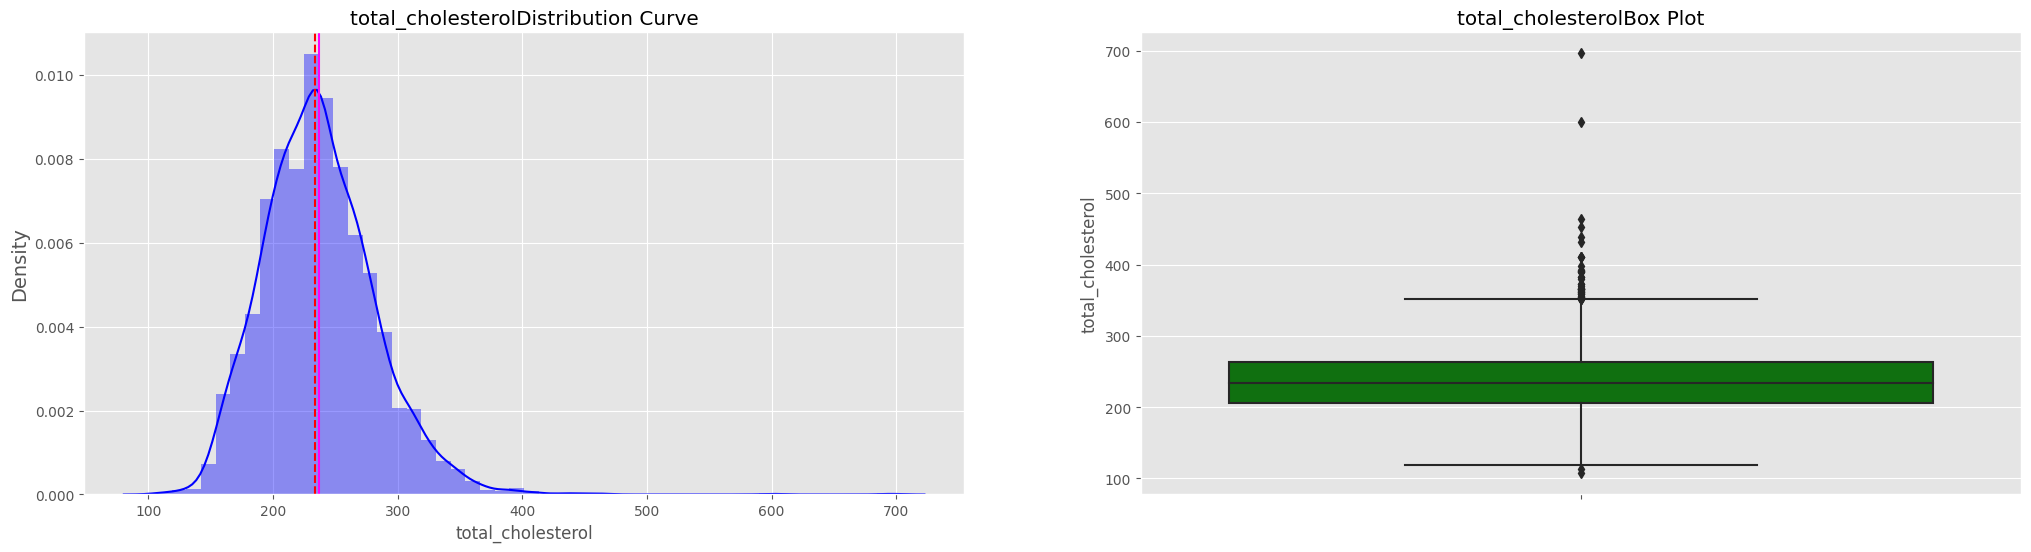

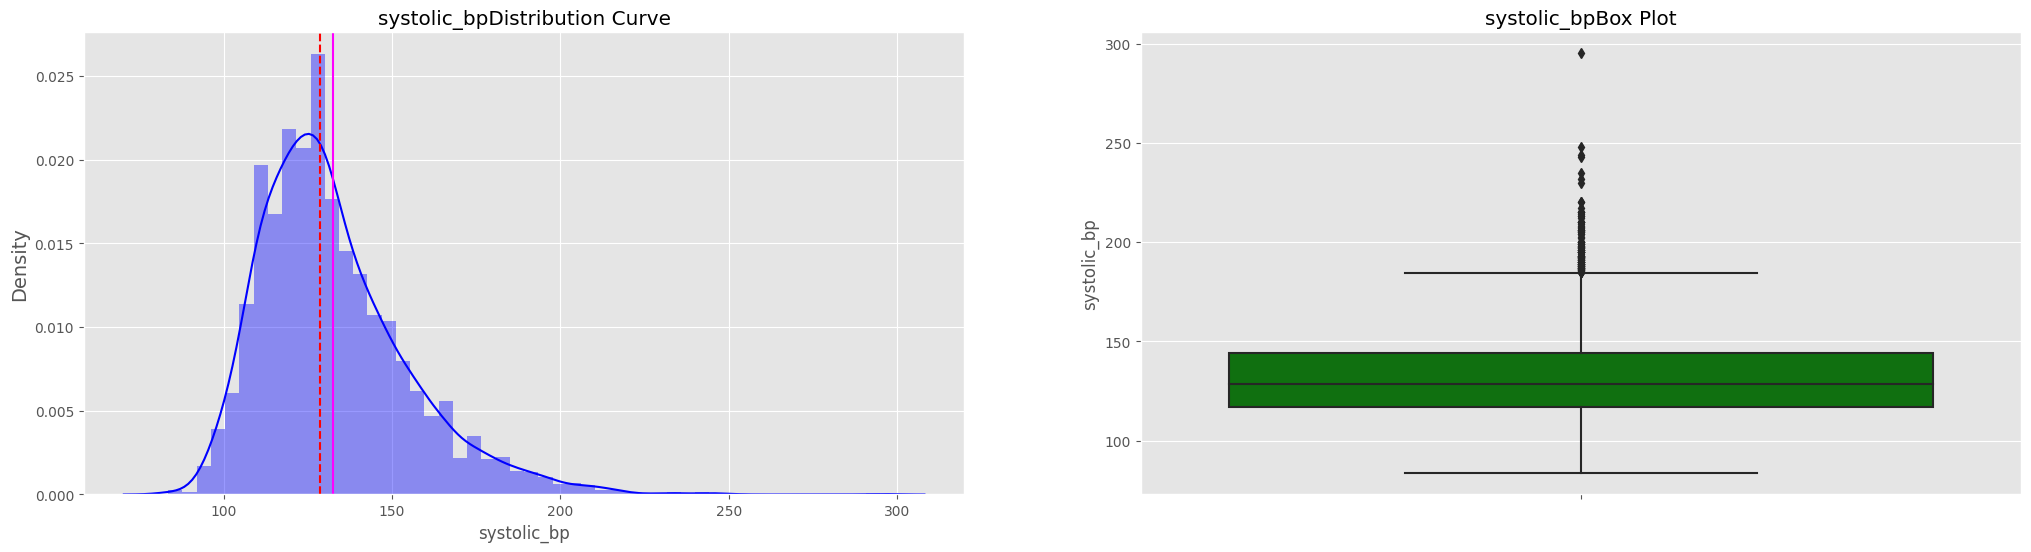

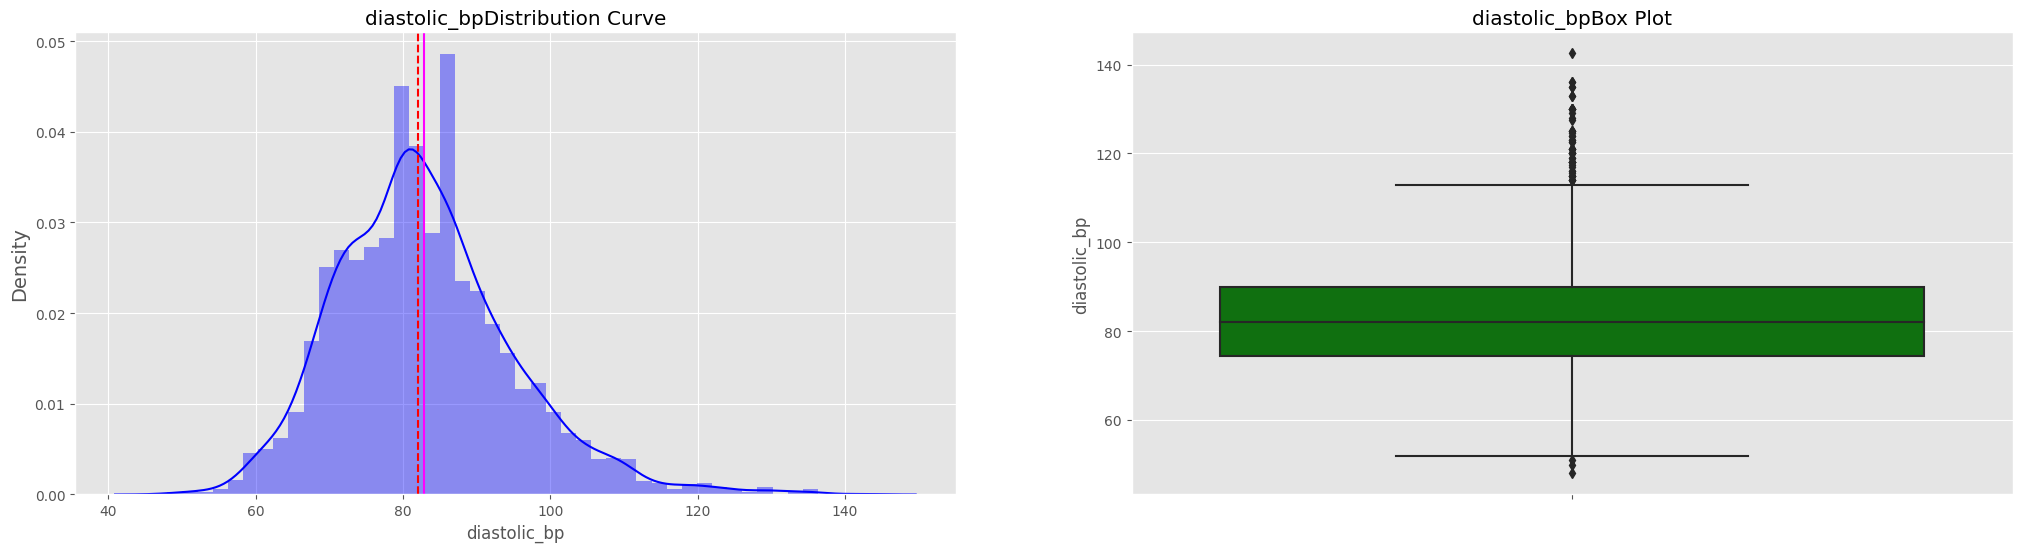

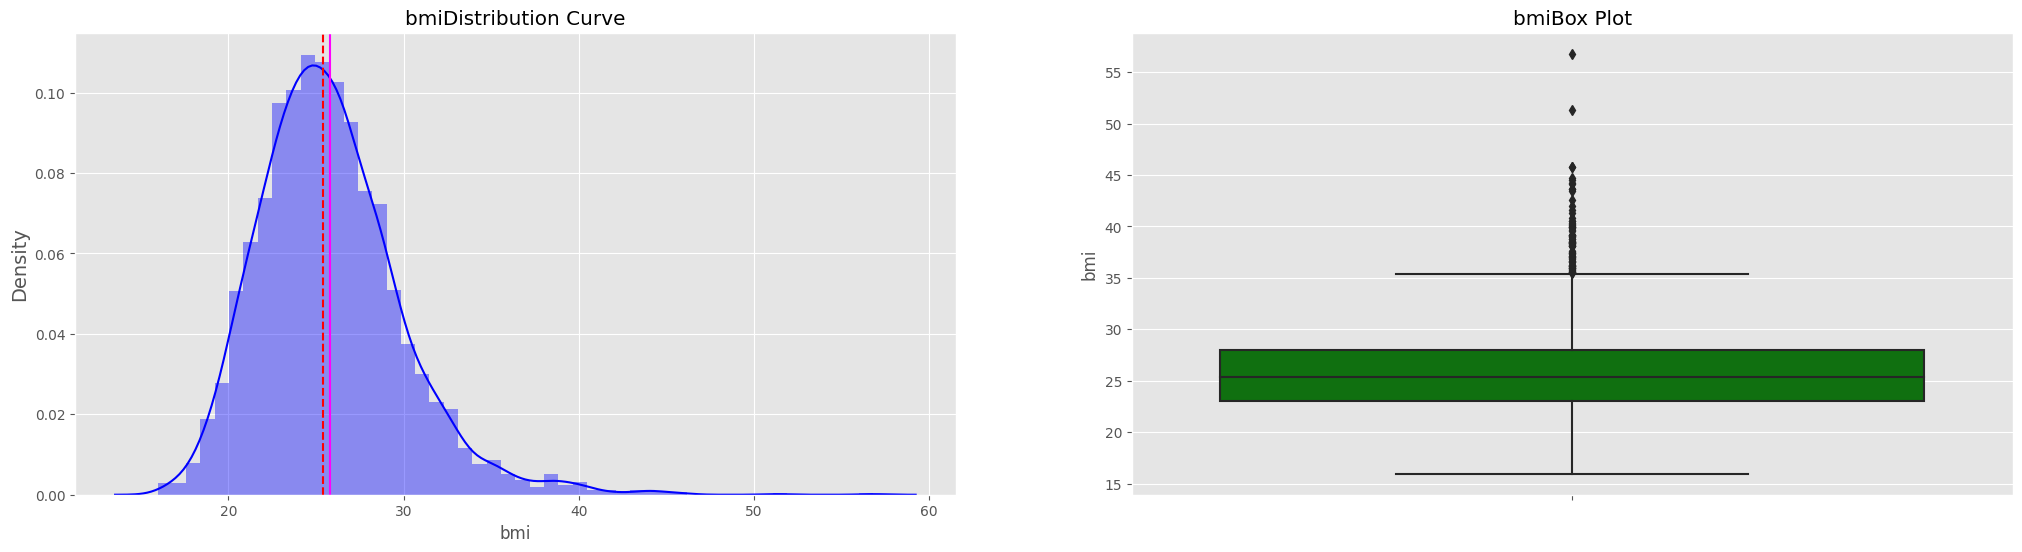

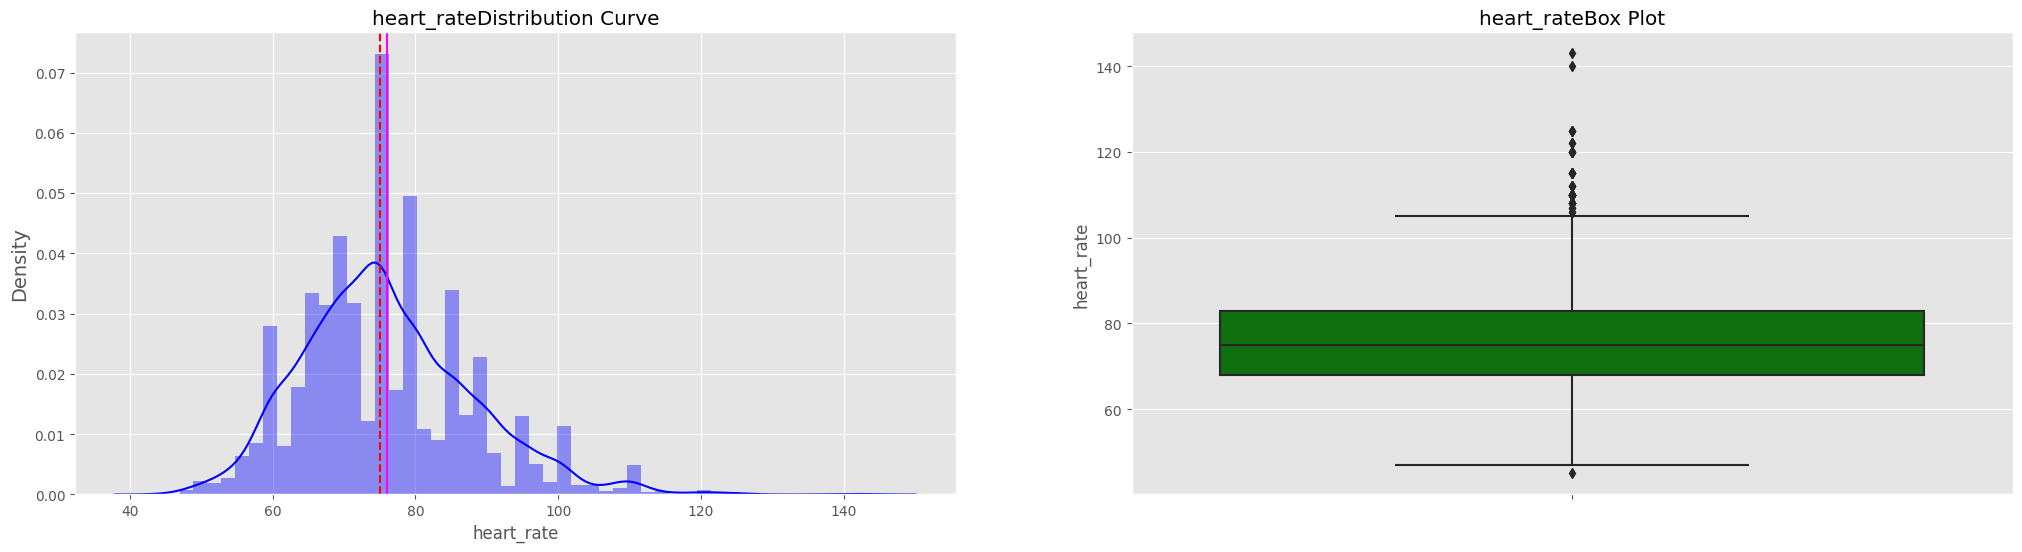

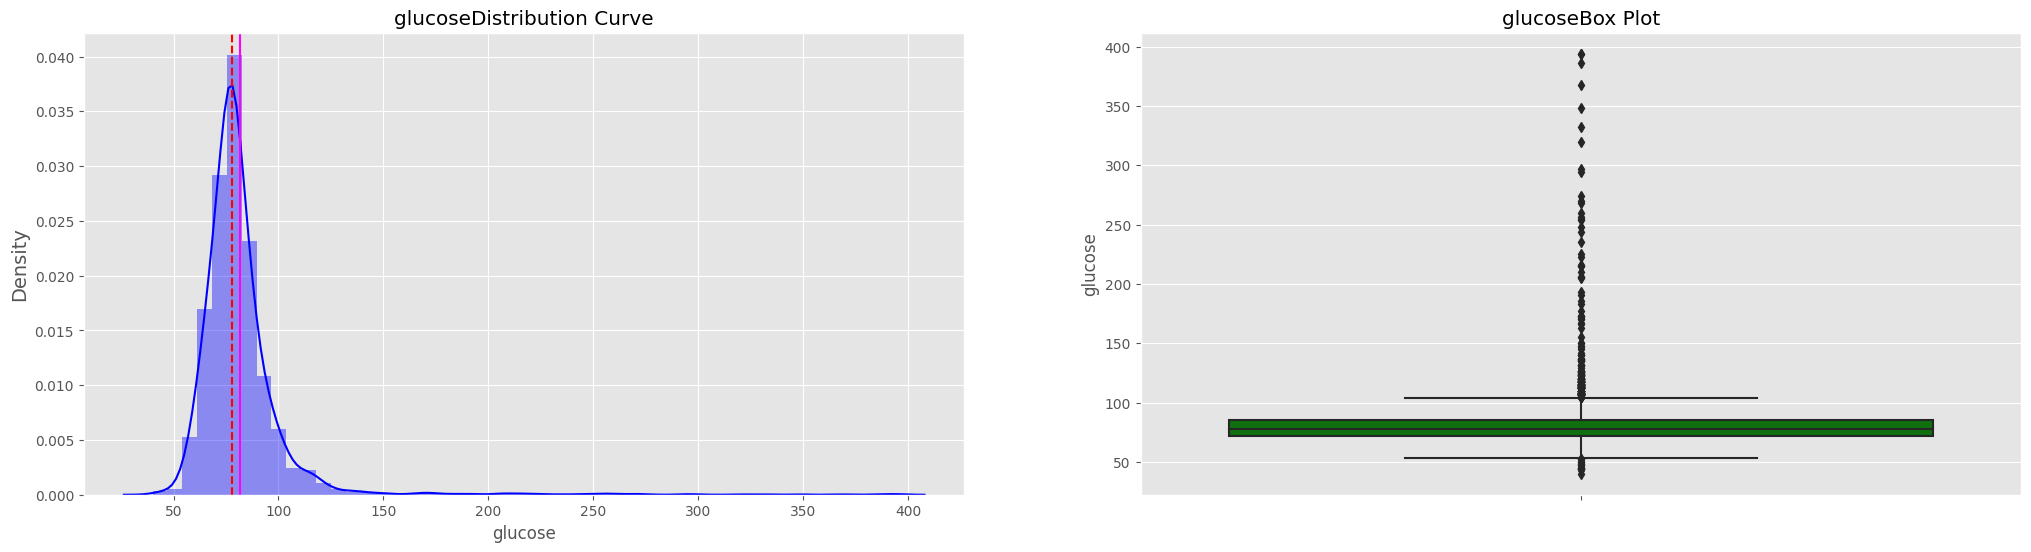

In [ ]:
# Chart - 2 visualization code

for col in continous_features:
    plt.figure(figsize=(25, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(CHD_df[col], color="blue")
    plt.title(col+   'Distribution Curve')

# The Axes. axvline() function in axes module of matplotlib library is used to add a vertical line across the axis.
# It will show where the "mean" and "median" lie for each plot

    plt.ylabel("Density", size=14)
    plt.axvline(CHD_df[col].mean(),color='magenta',linewidth=1.5)
    plt.axvline(CHD_df[col].median(),color='red',linestyle="dashed",linewidth=1.5)

# using subplot() function of matplotlib to create boxplot in this figure itself
# Box plot is used to check outliers are present in respective features or not

    plt.subplot(1, 2, 2)
    sns.boxplot(y=CHD_df[col], color="green")
    plt.title(col+   'Box Plot')

plt.show()

##### 1. Why did you pick the specific chart?

I have picked the above chart because it combines histogram,kde and box plot that offers a comprehensive visualization of the data distribution and outliner as well. It allows for a better understanding of the distribution's characteristics, such as its shape, peaks, and deviations from a normal distribution.The combined plot provides a richer visualization that incorporates both the frequency-based information from the histogram and the smooth density estimate from the KDE plot and in Box plot the quartile divides the data in four equal parts from which we can recognize max.,min.,mean and median of the data.

##### 2. What is/are the insight(s) found from the chart?

From the above plots it is visible that  glucose and total_cholesterol are highly right skewed, cigs_per_day, systolic_bp, and bmi are moderately right skewed, while Age, diastolic_bp, and heart_Rate are somewhat normally distributed and except age all other features have outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the distribution are creating a positive impact in terms related to healthcare and clinical diagnosis.For example- Monitoring the distribution of BP or cholesterol levels over time can help assess the effectiveness of interventions or treatments. If the distribution shifts towards lower values or becomes less right-skewed, it may indicate successful management of hypertension or hypercholesterolemia.

Right-skewed distributions in healthcare scenarios can provide valuable information for risk assessment, treatment planning, and monitoring, enabling healthcare professionals to make informed decisions and provide targeted care.

Additionally, depending on the specific analysis and our predefined, it may be necessary to consider data transformations or use appropriate statistical techniques to address the right-skewness, outliers and meet the assumptions of the analysis.

#### Chart - 3 Bar Plot of Categorical Independent Variable

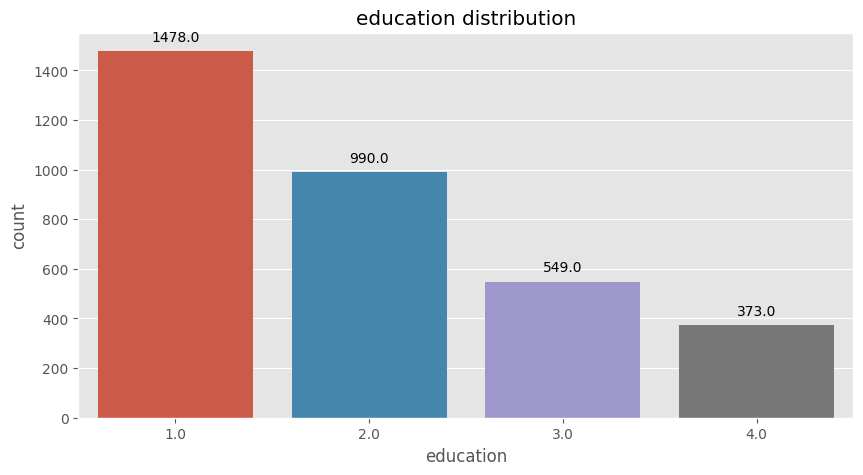

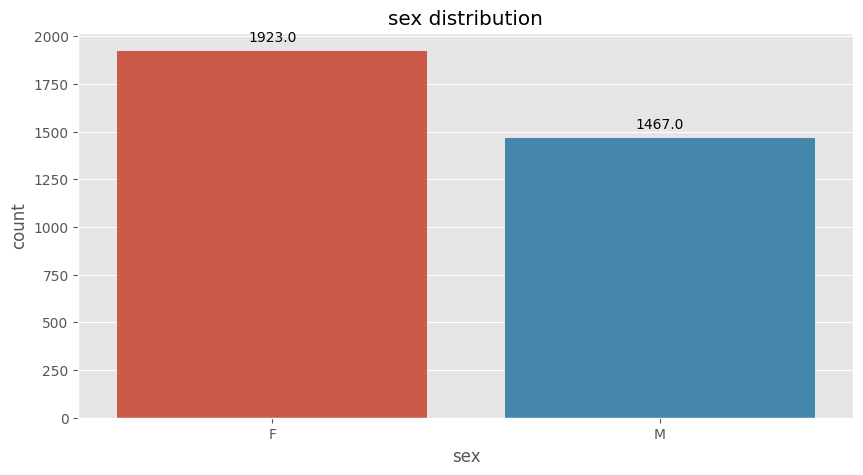

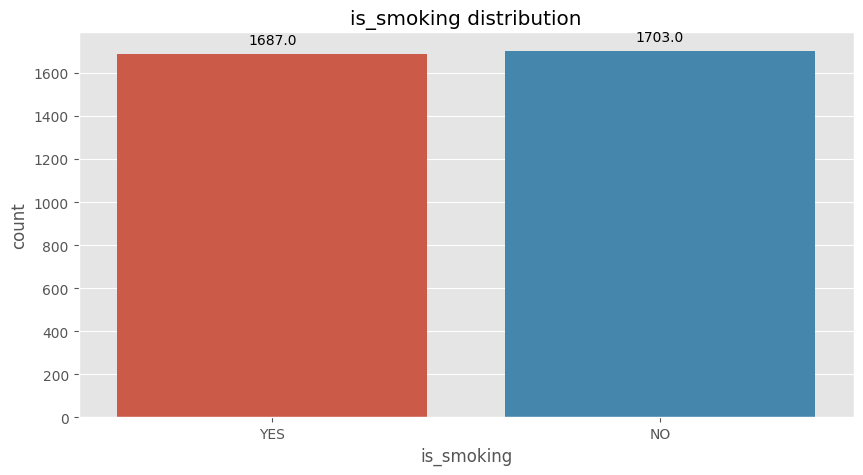

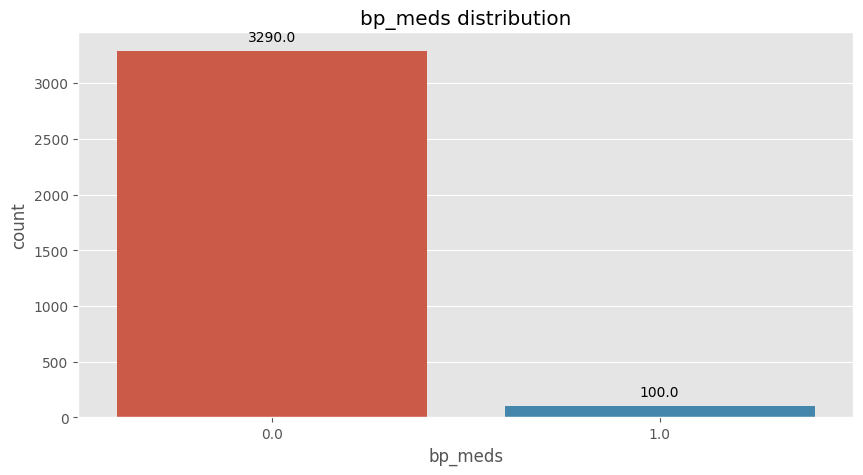

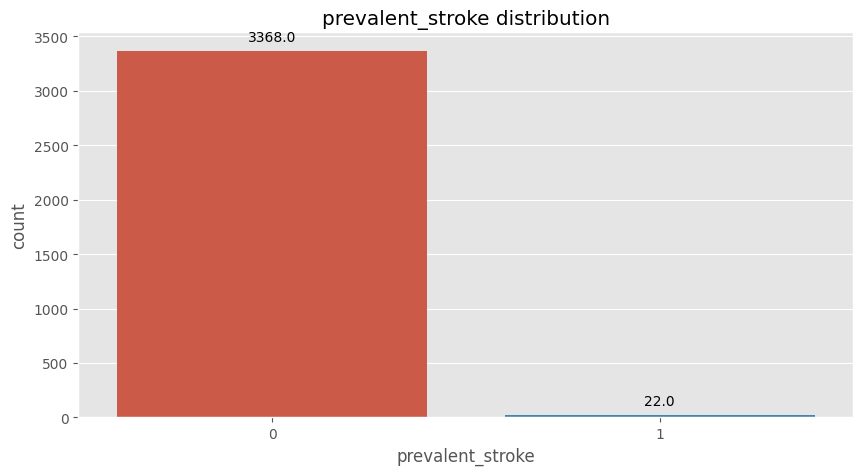

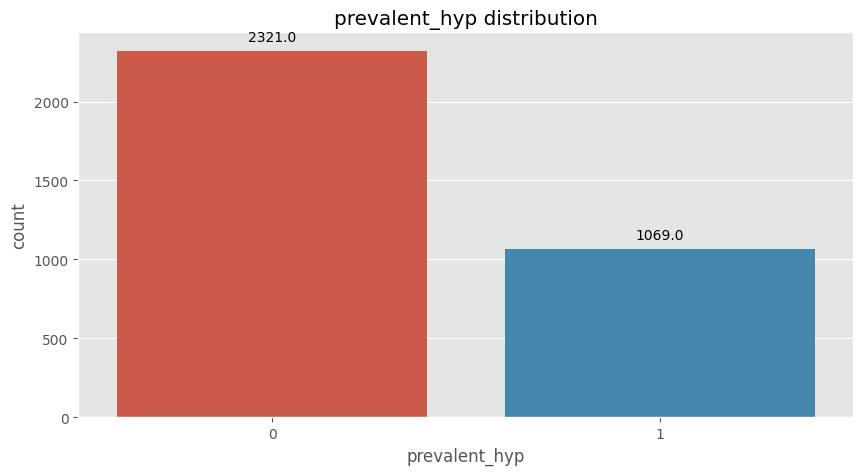

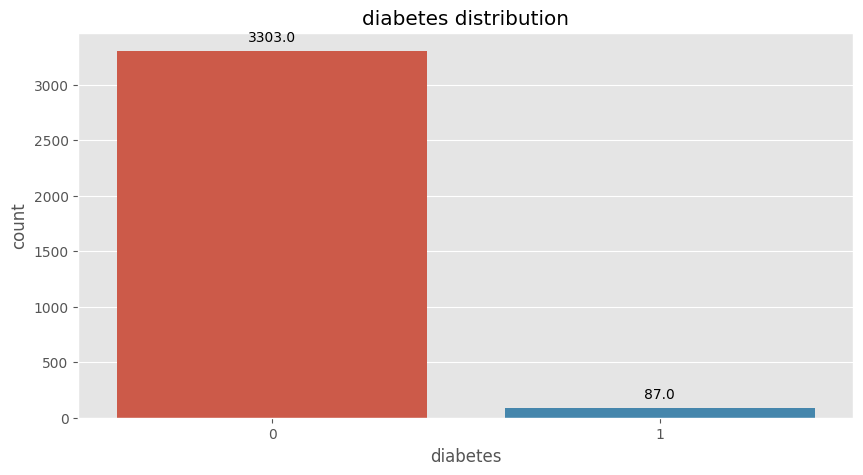

In [ ]:
# Chart - 3 visualization code
for i in categorical_features[0:7]:
  plt.figure(figsize=(10,5))
  p = sns.countplot(x=i, data = CHD_df)
  plt.xlabel(i)
  plt.title(i+' distribution')
  for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.show()

##### 1. Why did you pick the specific chart?

Bar chart (or count plot) is used to compare the frequencies or counts of different categories or groups. It represents each category as a separate bar, with the height or length of each bar representing the count or frequency of that category. Bar charts are commonly used to visualize the distribution of categorical variables and compare the counts between different categories.

##### 2. What is/are the insight(s) found from the chart?

From the above plot it is found that-

For the education feature, the category '1' is dominating which is followed by category '2', '3', and '4' respectively.

For the Sex feature, the females are dominating as compare to men.

For the is_smoking feature, distribution is almost even fro both smokers and non-smokers.

For bp_meds, prevalent_stroke, prevalent_hyp and diabetes features the distribution is imbalanced and biased towards No-Risk, having few counts of risk cases.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution of categories in various columns helps identify patterns and target specific demographics or areas of focus. For Example Clinical diagnosis based on the gender distribution and design educational programs based on the education levels of the target audience. Additionally, recognizing the imbalanced distribution of health conditions can guide businesses in developing specialized treatments or preventive measures to address specific needs.

However, it is important to note that the chart alone does not provide a complete picture of the business impact. The actual impact would depend on how well these insights are utilized according to the target class.Therefore, the gained insights have the potential to create a positive business impact, but their actual realization would require further analysis and strategic implementation.

##*Bivariate Analysis*

#### Chart - 4 Box Plot and Line Plot (Relation B/w continuous independent variable and dependent variable)

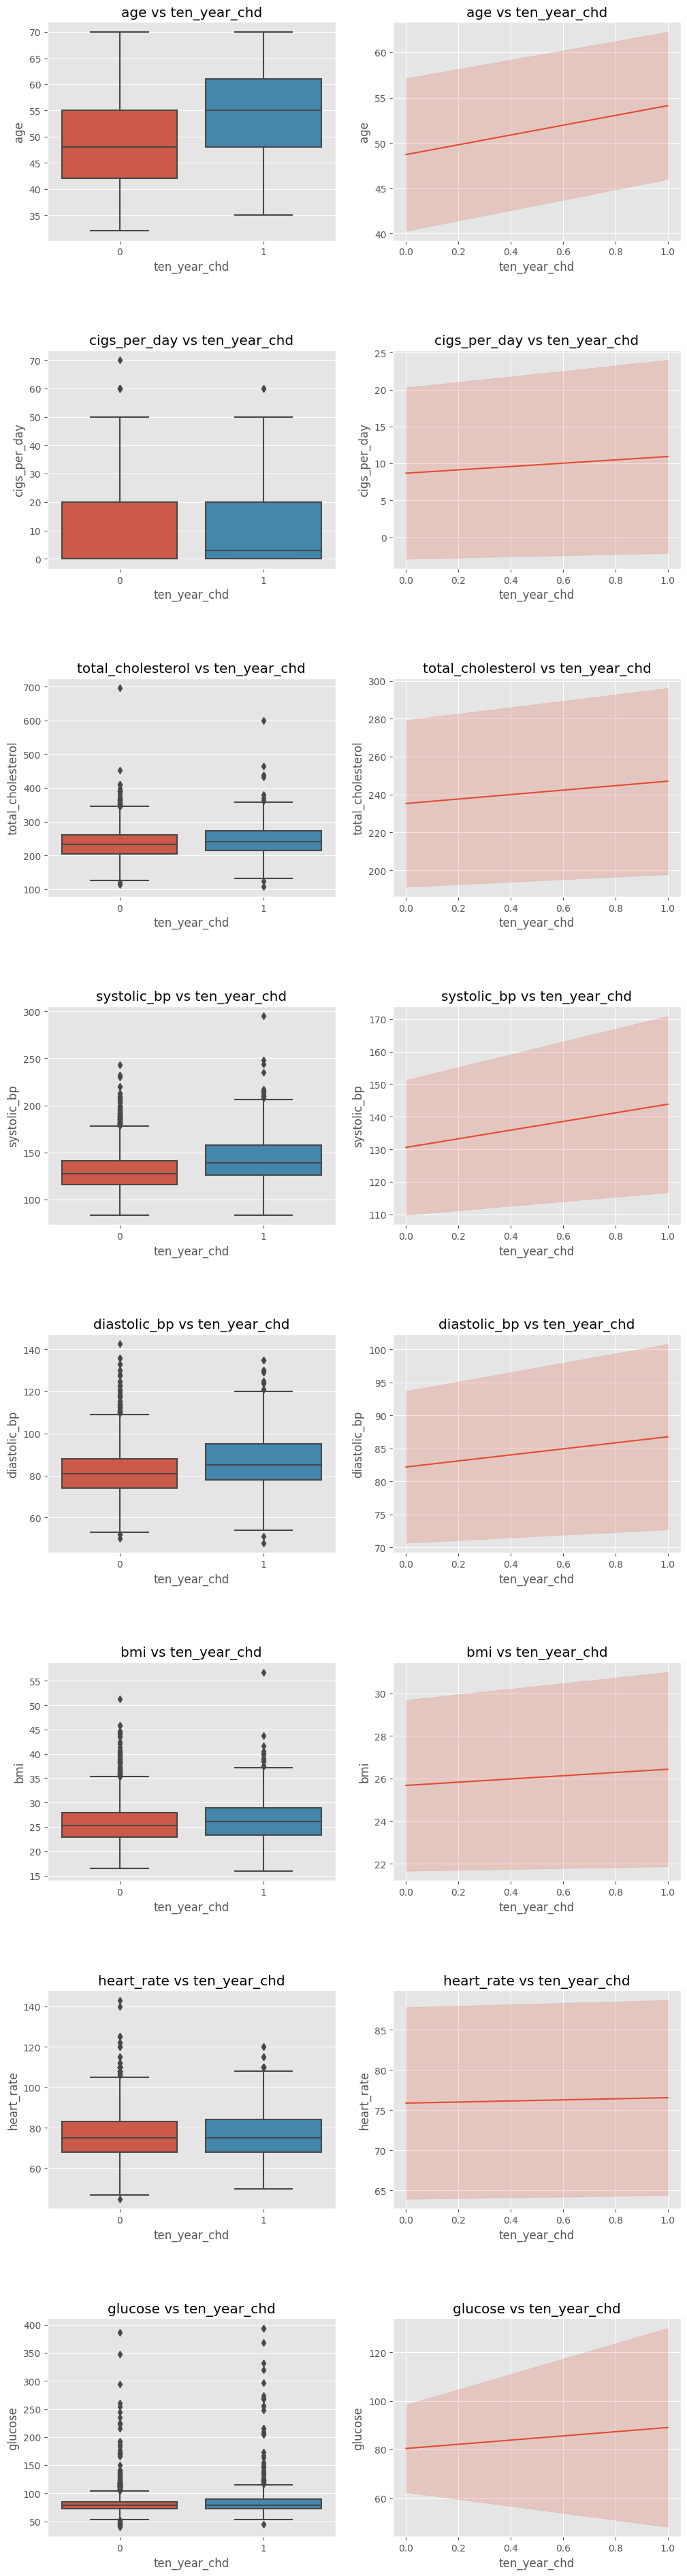

In [ ]:
# Create a new dataframe containing only the continuous features and the target variable
data_to_plot = CHD_df[continous_features + [target_variable]]

# Plotting
fig, axs = plt.subplots(nrows=len(continous_features), ncols=2, figsize=(12, 6 * len(continous_features)))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(continous_features):
    # Box Plot
    ax_box = axs[i, 0]
    sns.boxplot(x=target_variable, y=feature, data=data_to_plot, ax=ax_box)
    ax_box.set_title(f'{feature} vs {target_variable}')
    ax_box.set_xlabel(target_variable)
    ax_box.set_ylabel(feature)

    # Line Plot
    ax_line = axs[i, 1]
    sns.lineplot(x=target_variable, y=feature, data=data_to_plot, ci='sd', ax=ax_line)
    ax_line.set_title(f'{feature} vs {target_variable}')
    ax_line.set_xlabel(target_variable)
    ax_line.set_ylabel(feature)

plt.show()

##### 1. Why did you pick the specific chart?

I have picked Box plot and Line plot because in context of our dataset(i.e.) related to healthcare and clinical diagnosis box plot help to identify the features which are prone to CHD by viewing values that are very much deviated from the normal vaules, so we can look after that features and try to make their values to come in normal range by effective treatment.

Line plot is used to show the average or mean value of the continuous feature for each category of the target variable, and the error bars represent the variability or uncertainty around that mean value (e.g., standard deviation). This provides insights into the central tendency and spread of the continuous feature for different categories of the target variable.

##### 2. What is/are the insight(s) found from the chart?

From the above plots it is evident that the 'age' feature has no outliers and the patients having age between 40-45 yrs have lower risk of CHD.Patients having age in the range of 50-63 yrs have high risk of CHD and above 63 yrs risk lowers.

'Cigs_per_days' Feature showing no variation corresponding to risk of CHD, it is equally distributed, so it is not a good predictor.

Reamining Features like 'total_cholestrol', 'systolic_bp', 'Diastolic_bp',
 'heart_rate', 'bmi', 'glucose' have values which are very much deviated from average value, so these features are more tending towards the high risk of CHD.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights have positive impact in knowing the critical features which may lead to high risk of CHD but on the other hand it is suggestible to do additional analysis and statistical testing  to establish a significant association or causal relationship between the continuous feature and the target variable.

#### Chart - 5 Stacked Bar Plot(Realtionship B/w Categorical independent variable and dependent variable)

<Figure size 1000x500 with 0 Axes>

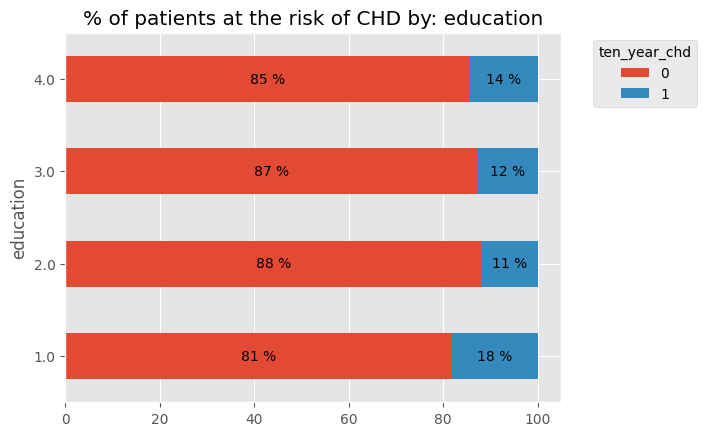

<Figure size 1000x500 with 0 Axes>

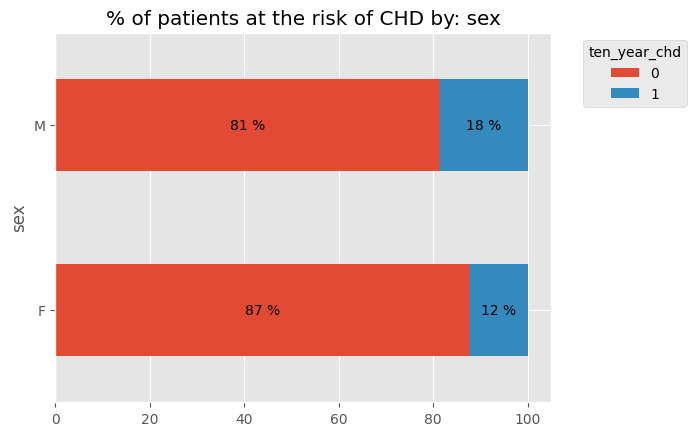

<Figure size 1000x500 with 0 Axes>

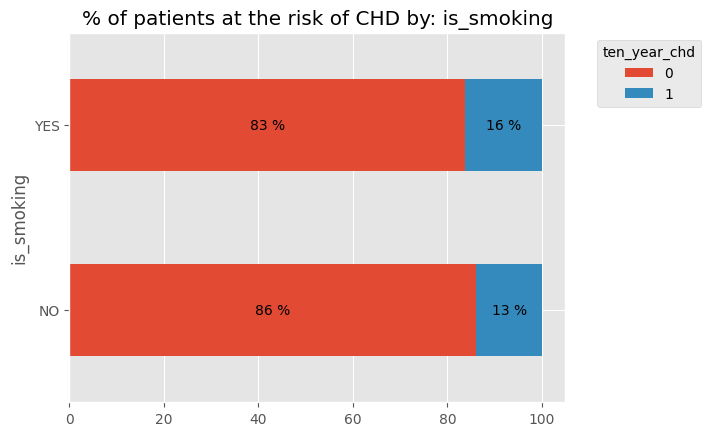

<Figure size 1000x500 with 0 Axes>

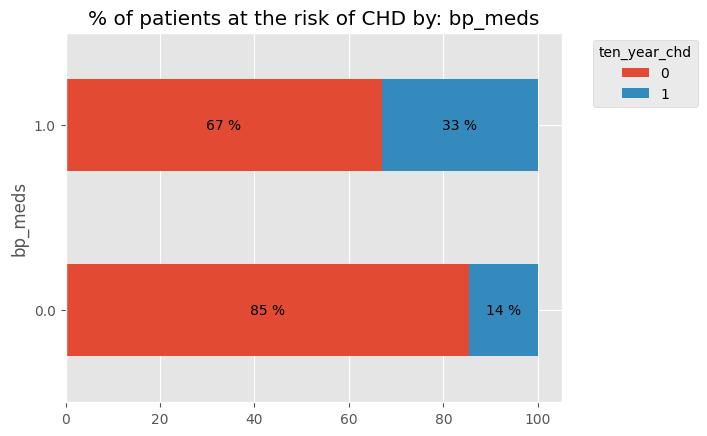

<Figure size 1000x500 with 0 Axes>

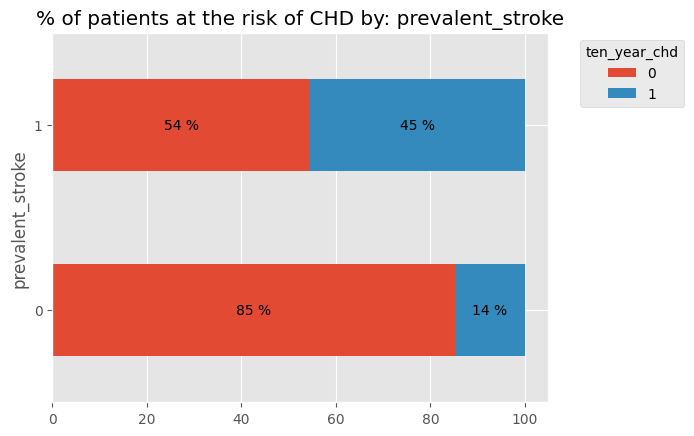

<Figure size 1000x500 with 0 Axes>

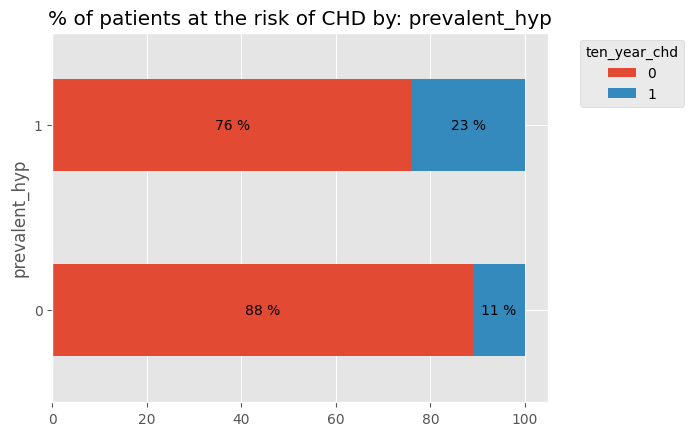

<Figure size 1000x500 with 0 Axes>

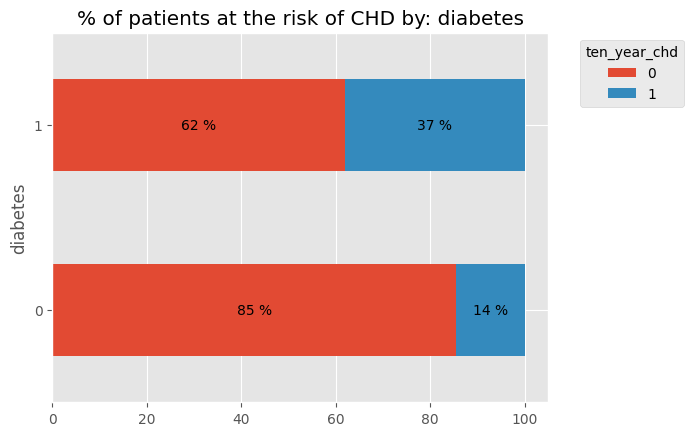

In [ ]:
# Chart - 5 visualization code
for i in categorical_features[:-1]:
    x_var, y_var = i, target_variable
    plt.figure(figsize=(10,5))
    df_grouped = CHD_df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()


##### 1. Why did you pick the specific chart?

A 100% stacked bar plot, also known as a normalized stacked bar plot, is a variation of the stacked bar plot where the height of each segment is normalized to represent the percentage or proportion of the total count within each category.Some features of the stacked horizontal bar chart include:

Proportional Comparison: A 100% stacked bar plot allows for a direct comparison of the relative proportions or percentages within each category. By normalizing the heights, it becomes easier to identify the relative contributions of different categories within each group or variable.

Distribution across categories: The chart provides insights into the distribution and composition of the data across different categories. It helps identify which categories contribute more or less to the overall composition.

Facilitating trend analysis: By comparing stacked horizontal bar charts over different time periods or groups, it is possible to observe trends and changes in the composition of categories. This can provide insights into shifts in proportions or the relative importance of different categories over time.

##### 2. What is/are the insight(s) found from the chart?

From the above Plot it is evident that 'education' feature behaves similar throughout the different education categories and doesn't provide much information regarding the risk of CHD.

'Sex' and 'is_smoking' feature is at a slight higher risk of CHD for male and for the patients who have prevalent habbit of smoking respectively but still these proportions are not that much tending towards risk of CHD.

Features having positive Medical history of 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', and 'Diabetes' are showing very risk of CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart reveals the distribution and composition of different categories in relation to the occurrence of CHD.These insights can guide the healthcare industry to reduce the occurrence of CHD in high-risk categories and can improve patient outcomes, enhance customer satisfaction, and drive positive growth.

#### Chart - 6 Heatmap(Relation B/w independent and dependent variable)

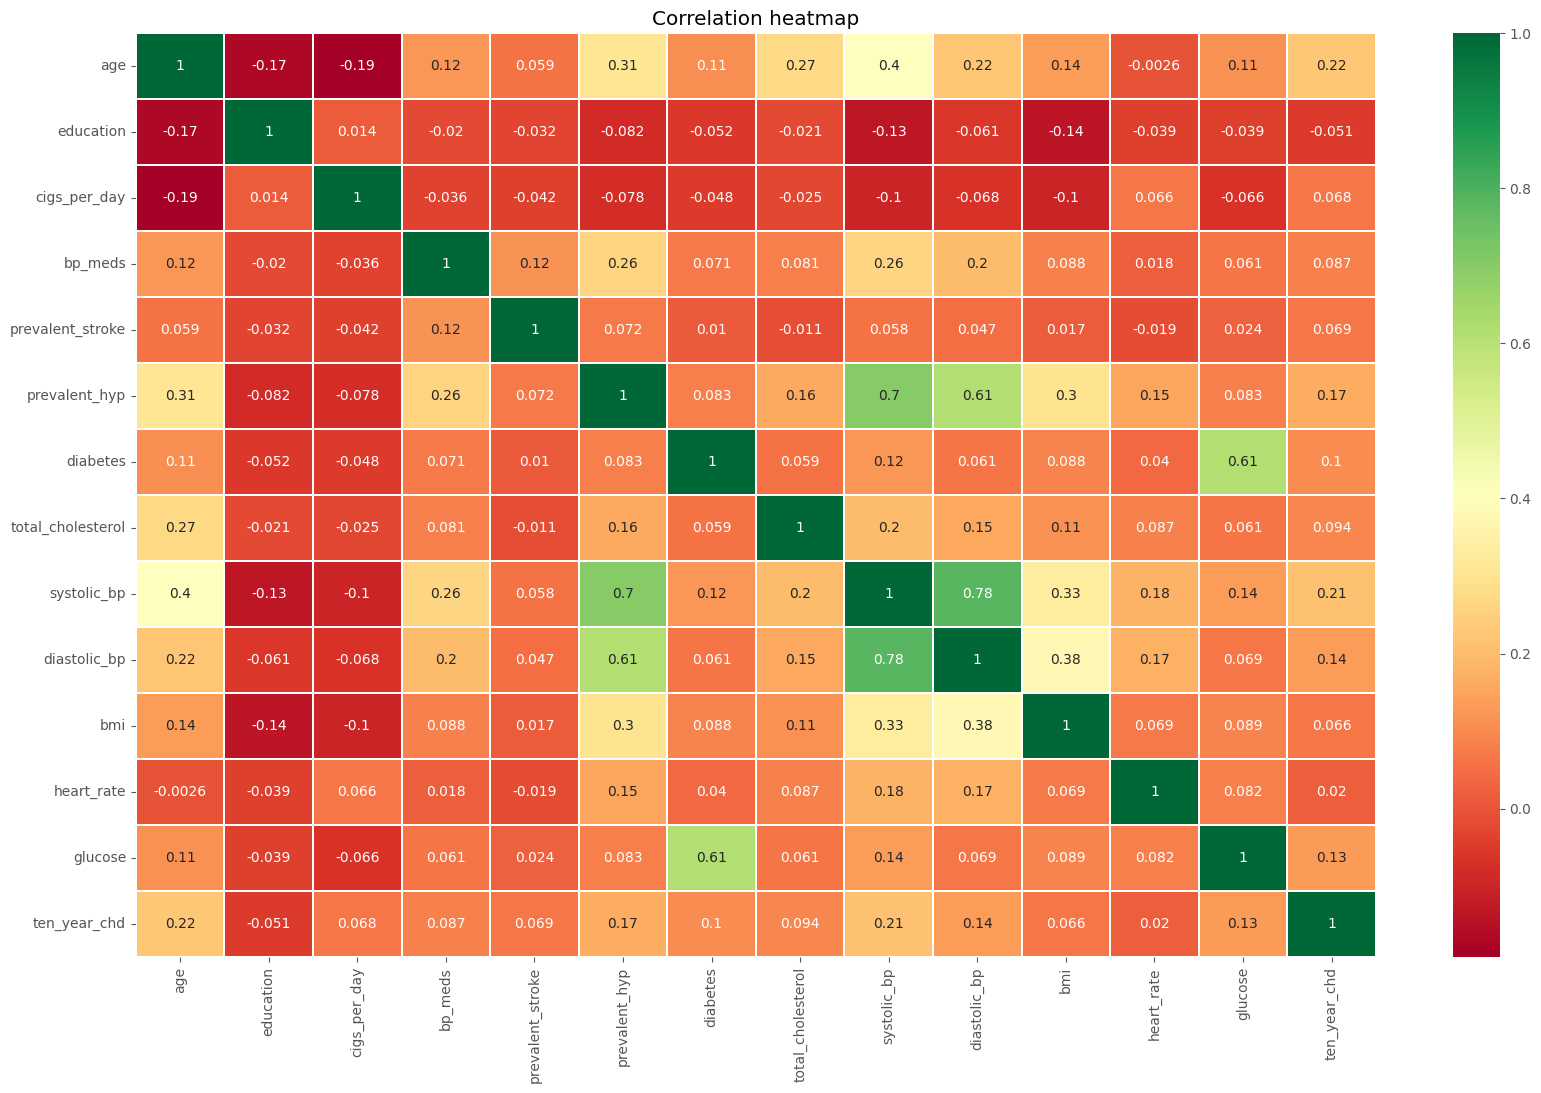

In [ ]:
# Chart - 6 visualization code
## Correlation heatmap give the correlation parameter b/w numeric features and target feature.
plt.figure(figsize = (20,12))
sns.heatmap(CHD_df.corr(),  fmt=".2g",cmap='RdYlGn',linewidths=0.30,  annot = True)
plt.title('Correlation heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps are used to visually represent data in a matrix form where each cell's color is determined by its value. Heatmaps are commonly used in data visualization to represent patterns or relationships in data, and to identify areas of high and low values or activity.Heatmap consists of small square boxes having a numeric value known as correlation coefficient.A correlation coefficient is a statistical measure that indicates the strength and direction of a linear relationship between two variables. A correlation coefficient of 0 indicates no linear relationship between the two variables, while a correlation coefficient of 1 indicates a perfect positive linear relationship (i.e., as one variable increases, the other variable increases by a constant proportion). A correlation coefficient of -1 indicates a perfect negative linear relationship (i.e., as one variable increases, the other variable decreases by a constant proportion)

##### 2. What is/are the insight(s) found from the chart?

From the above plot it is evident that multicollinearity exits b/w some of the features and they are:

glucose and diabetes are 61% correlated to each other.

Diastolic_bp and systolic_bp are 78% correalted to each other.

Prevalent_hyp and systolic_bp are 70% correlated to each other.

prevalent_hyp and diastolic_bp are 61% correlated to each other.

Target Feature(ten_year_chd) and age, total_cholesterol, prevalent_hyp, prevalent_stroke are strongly correlated to each other.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Currently we can't conclude that the gained insights are positive as their is multicollinearity in dataset that is affecting the desired correlation b/w target feature and necessary independent features. Only after treating multicollinearity we can conclude that the desried outcome is positive or not for our model implementation.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

For variety of datasets and problem cases , there are various statistical test which are as follows:



* One categorical feature: one proportion test.
* One numerical and one categorical (2 categories) feature: T-Test.
* Categorical features(= two categories): chi-squared Test
* One numerical and one categorical (>2 categories) feature: Anova Test
* Two numerical features: Correlation Test








### Hypothetical Statement - 1

**Hypothesis:** *Age is a significant risk factor for CHD*

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** Age is not significant risk factor for CHD.

**Alternate Hypothesis:** Age is a significant risk factor for CHD.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_data = pd.crosstab(CHD_df['ten_year_chd'], CHD_df['age'], margins=False)
hypo_data

age,32,33,34,35,36,37,38,39,40,41,...,61,62,63,64,65,66,67,68,69,70
ten_year_chd,,,,,,,,,,,,,,,,,,,,,
0,1,4,16,27,72,71,112,134,137,133,...,66,60,65,59,27,16,22,7,4,1
1,0,0,0,2,3,2,7,5,11,11,...,21,20,28,16,16,14,11,7,1,1


**Predefined Significance level= 0.05**

In [ ]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)

In [ ]:
p

8.20034951967931e-25

*P-value is smaller than the predefined significance level, so we will reject the null hypothesis and accept the alternate hypothesis.*

##### Which statistical test have you done to obtain P-Value?

I have used the Chi-Square contingency test to determine the statistical significance (p-value) of our hypothesis.

##### Why did you choose the specific statistical test?

The Chi-Square contingency test serves as a basis for statistical inference, allowing us to investigate the relationship between variables based on the observed data. By applying this test, we can determine whether there is a significant association between the variables of interest.

### Hypothetical Statement - 2

**Hypothesis:** *Diabetes is significant risk factor for CHD*

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** Diabetes is not significant risk factor for CHD.

**Alternate Hypothesis:** Diabetes is a significant risk factor for CHD.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_data = pd.crosstab(CHD_df['ten_year_chd'], CHD_df['diabetes'], margins=False)
hypo_data

diabetes,0,1
ten_year_chd,,
0,2825,54
1,478,33


**Predefined Significance level= 0.05**

In [ ]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)

In [ ]:
p

3.982978687382329e-09

*P-value is smaller than the predefined significance level, so we will reject the null hypothesis and accept the alternate hypothesis.*

##### Which statistical test have you done to obtain P-Value?

I have used the Chi-Square contingency test to determine the statistical significance (p-value) of our hypothesis.

##### Why did you choose the specific statistical test?

The Chi-Square contingency test serves as a basis for statistical inference, allowing us to investigate the relationship between variables based on the observed data. By applying this test, we can determine whether there is a significant association between the variables of interest.

### Hypothetical Statement - 3

**Hypothesis:** *High total_cholesterol level is a significant risk factor for CHD.*

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** High total_cholesterol is not significant risk factor for CHD.

**Alternate Hypothesis:** High total_cholesterol is a significant risk factor for CHD.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_data = pd.crosstab(CHD_df['ten_year_chd'], CHD_df['total_cholesterol'], margins=False)
hypo_data

total_cholesterol,107.0,113.0,119.0,124.0,126.0,129.0,133.0,135.0,137.0,140.0,...,391.0,392.0,398.0,410.0,432.0,439.0,453.0,464.0,600.0,696.0
ten_year_chd,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,0,1,1,0,2,1,1,...,2,1,1,3,0,0,1,0,0,1
1,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,1,0,1,1,0


**Predefined Significance level= 0.05**

In [ ]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)

In [ ]:
p

0.0010368520186365476

*P-value is smaller than the predefined significance level, so we will reject the null hypothesis and accept the alternate hypothesis.*

##### Which statistical test have you done to obtain P-Value?

I have used the Chi-Square contingency test to determine the statistical significance (p-value) of our hypothesis.

##### Why did you choose the specific statistical test?

The Chi-Square contingency test serves as a basis for statistical inference, allowing us to investigate the relationship between variables based on the observed data. By applying this test, we can determine whether there is a significant association between the variables of interest.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation.
CHD_df.isnull().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Missing values are handled in data wrangling process and the imputation techniques which I have used is: For continuous features I have replaced missing values with median and For categorical features I have replaced missing values with mode.

### 2. Handling Outliers

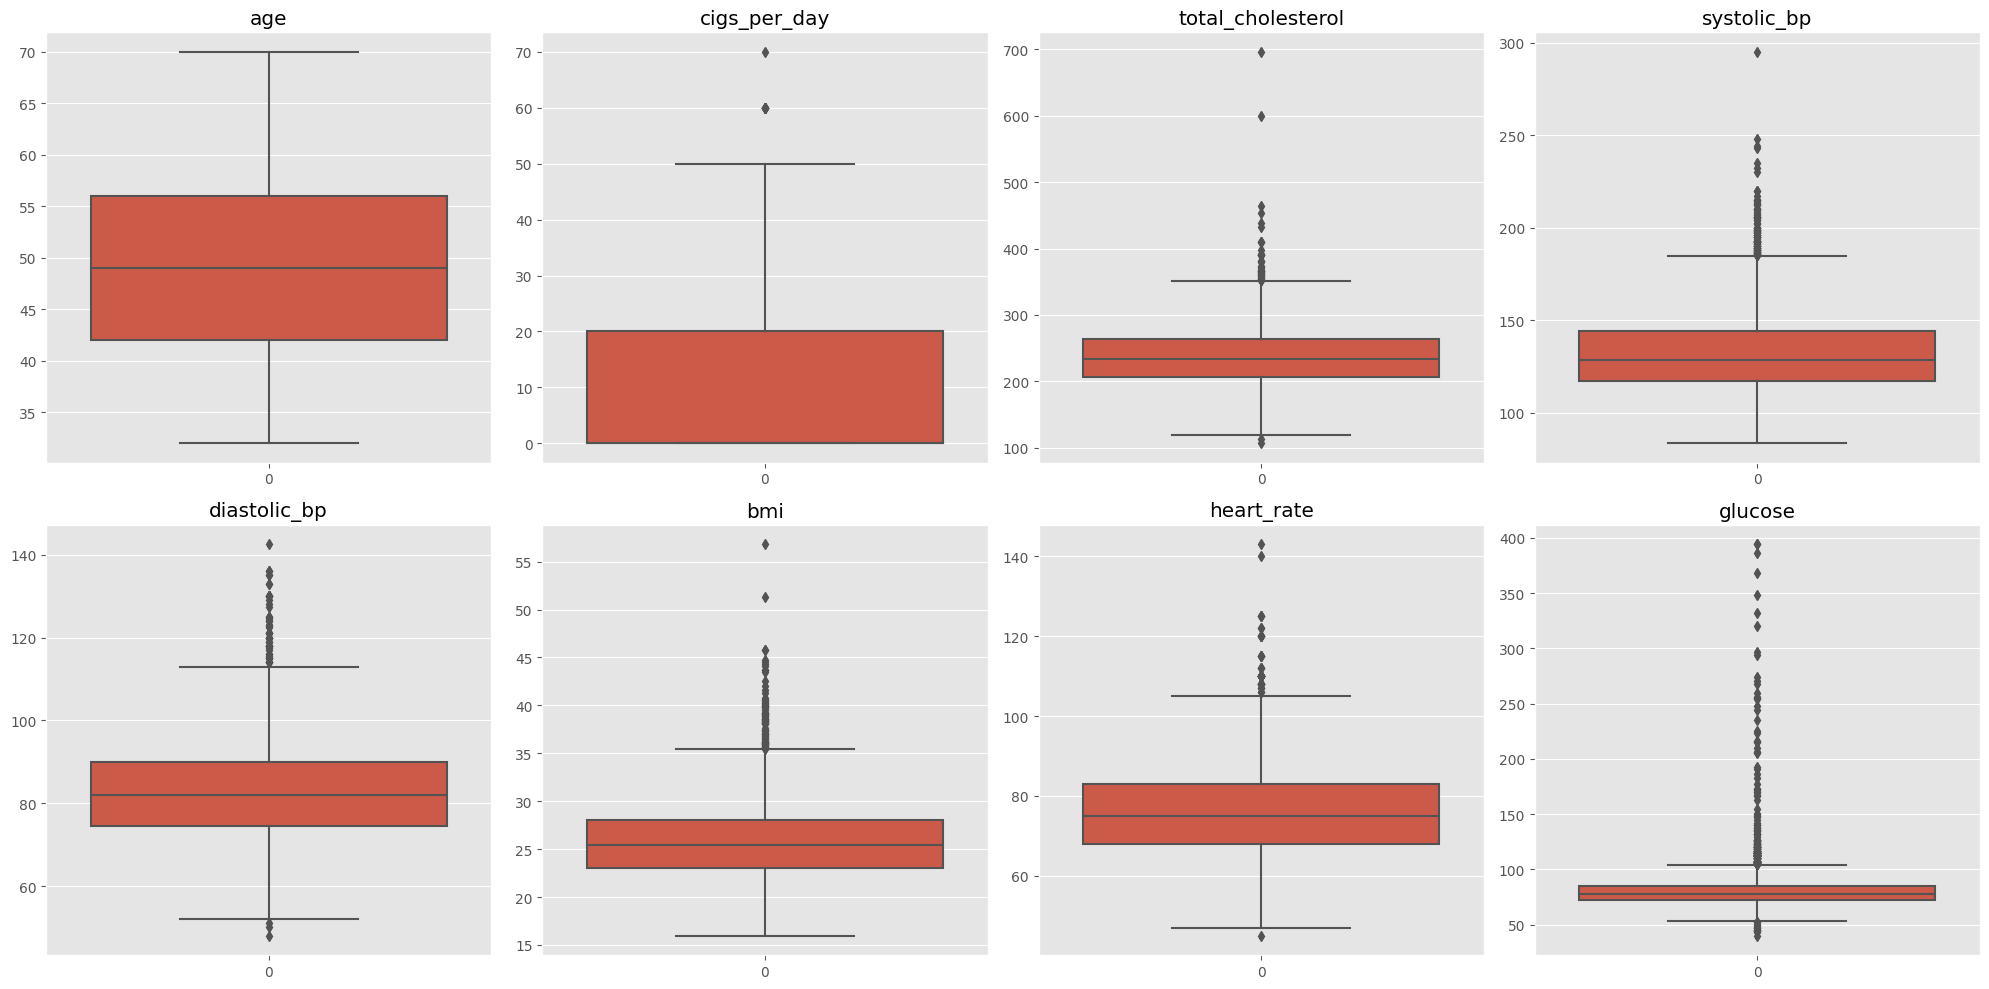

In [ ]:
# Handling Outliers & Outlier treatments
## Visualizing the outliers in continuous features with Box Plot.
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
for i, ax in zip(continous_features, axes.flatten()):
    sns.boxplot(CHD_df[i], ax=ax)
    ax.set_title(i)
plt.tight_layout()

In [ ]:
## Creating a function to Know the number of outliers and its percentage contribution in dataset
# IQR= Interquartile Range
def detect_outliers_IQR(bike_df):
    data = sorted(bike_df)
    q1, q2, q3 = np.percentile(data, [25, 50, 75])
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")
    IQR = q3 - q1
    lower_bound, upper_bound = q1 - 1.5*IQR, q3 + 1.5*IQR
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}, IQR: {IQR}")


    outliers = [i for i in data if i < lower_bound or i > upper_bound]
    num_outliers = len(outliers)
    perc_outliers = round(num_outliers * 100 / len(data), 2)
    print(f"Total number of outliers: {num_outliers}")
    print(f"Total percentage of outliers: {round(perc_outliers, 2)}%")

    results = (
        q1, q2, q3,
        IQR,
        lower_bound, upper_bound,
        outliers,
        num_outliers,
        perc_outliers
    )
    return results

In [ ]:
for feature in continous_features:
  print(feature,":")
  detect_outliers_IQR(CHD_df[feature])
  print("-"*50)

age :
q1:42.0, q2:49.0, q3:56.0
Lower bound: 21.0, Upper bound: 77.0, IQR: 14.0
Total number of outliers: 0
Total percentage of outliers: 0.0%
--------------------------------------------------
cigs_per_day :
q1:0.0, q2:0.0, q3:20.0
Lower bound: -30.0, Upper bound: 50.0, IQR: 20.0
Total number of outliers: 9
Total percentage of outliers: 0.27%
--------------------------------------------------
total_cholesterol :
q1:206.0, q2:234.0, q3:264.0
Lower bound: 119.0, Upper bound: 351.0, IQR: 58.0
Total number of outliers: 43
Total percentage of outliers: 1.27%
--------------------------------------------------
systolic_bp :
q1:117.0, q2:128.5, q3:144.0
Lower bound: 76.5, Upper bound: 184.5, IQR: 27.0
Total number of outliers: 105
Total percentage of outliers: 3.1%
--------------------------------------------------
diastolic_bp :
q1:74.5, q2:82.0, q3:90.0
Lower bound: 51.25, Upper bound: 113.25, IQR: 15.5
Total number of outliers: 58
Total percentage of outliers: 1.71%
-----------------------

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used **Interquartile Range** method to detect the outliers but haven't removed outliers or replaced it with median because our dataset is from healthcare domain and I believe that it is crucial to retain all patient details in our dataset, even if they are outliers, to ensure that we have a comprehensive understanding of the data. Hence, I have considered all data points, including the outliers, in our analysis.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
CHD_df1=CHD_df.copy() ## Copying will secure the main dataframe.

In [ ]:
CHD_df1['sex'].replace({'M':0,'F':1},inplace=True)
CHD_df1['is_smoking'].replace({'NO':0,'YES':1},inplace=True)

In [ ]:
CHD_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   int64  
 1   education          3390 non-null   float64
 2   sex                3390 non-null   int64  
 3   is_smoking         3390 non-null   int64  
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   int64  
 7   prevalent_hyp      3390 non-null   int64  
 8   diabetes           3390 non-null   int64  
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   int64  
dtypes: float64(9), int64(7)


#### What all categorical encoding techniques have you used & why did you use those techniques?

As, we know in our dataframe there are two features having object data type, they are 'sex' and 'is_smoking' having categorical label in it as 'F', 'M' and 'YES', 'NO' respectively. I have use **Binary Label Encoding** which will convert object data type into numeric data type and address categorical label as '0' for one category and '1' for another category. Since the category feature can only have two possible values, I utilised the label encoding technique to transform the labels into a numeric form that is machine-readable.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
CHD_df1.head()


,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


*In Data Visualization, from Heatmap we have observed that systolic_bp and diastolic_bp, glucose, and diabetes are strongly correlated with each other, so we can make new feature with the help of these features that will help in feature selection as well as help in reduction of multicollinearity.*

In [ ]:
## Creating new feature pulse_pressure and dropping systolic_bp and diastolic_bp
CHD_df1['pulse_pressure'] = CHD_df1['systolic_bp']-CHD_df1['diastolic_bp']
CHD_df1.drop('systolic_bp',axis=1,inplace=True)
CHD_df1.drop('diastolic_bp',axis=1,inplace=True)

In [ ]:
## Creating a new feature postpandrial_glucose_diabetes with glucose and diabetes and dropping glucose and diabetes.
## Taking glucose values greater than 140 and having diabetes, as > 140 value represents the patient having diabetes.
CHD_df1['postpandrial_glucose_diabetes'] = ((CHD_df1['glucose'] > 140) & (CHD_df1['diabetes'] == 1)).astype(int)
CHD_df1.drop('glucose',axis=1,inplace=True)
CHD_df1.drop('diabetes',axis=1,inplace=True)

In [ ]:
CHD_df1.head()

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,total_cholesterol,bmi,heart_rate,ten_year_chd,pulse_pressure,postpandrial_glucose_diabetes
id,,,,,,,,,,,,,,
0,64,2.0,1,1,3.0,0.0,0,0,221.0,25.38,90.0,1,63.0,0
1,36,4.0,0,0,0.0,0.0,0,1,212.0,29.77,72.0,0,70.0,0
2,46,1.0,1,1,10.0,0.0,0,0,250.0,20.35,88.0,0,45.0,0
3,50,1.0,0,1,20.0,0.0,0,1,233.0,28.26,68.0,1,70.0,0
4,64,1.0,1,1,30.0,0.0,0,0,241.0,26.42,70.0,0,51.5,0


In [ ]:
CHD_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            3390 non-null   int64  
 1   education                      3390 non-null   float64
 2   sex                            3390 non-null   int64  
 3   is_smoking                     3390 non-null   int64  
 4   cigs_per_day                   3390 non-null   float64
 5   bp_meds                        3390 non-null   float64
 6   prevalent_stroke               3390 non-null   int64  
 7   prevalent_hyp                  3390 non-null   int64  
 8   total_cholesterol              3390 non-null   float64
 9   bmi                            3390 non-null   float64
 10  heart_rate                     3390 non-null   float64
 11  ten_year_chd                   3390 non-null   int64  
 12  pulse_pressure                 3390 non-null   f

#### 2. Feature Selection

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'education'),
 Text(2.5, 0, 'sex'),
 Text(3.5, 0, 'is_smoking'),
 Text(4.5, 0, 'cigs_per_day'),
 Text(5.5, 0, 'bp_meds'),
 Text(6.5, 0, 'prevalent_stroke'),
 Text(7.5, 0, 'prevalent_hyp'),
 Text(8.5, 0, 'total_cholesterol'),
 Text(9.5, 0, 'bmi'),
 Text(10.5, 0, 'heart_rate'),
 Text(11.5, 0, 'ten_year_chd'),
 Text(12.5, 0, 'pulse_pressure'),
 Text(13.5, 0, 'postpandrial_glucose_diabetes')]

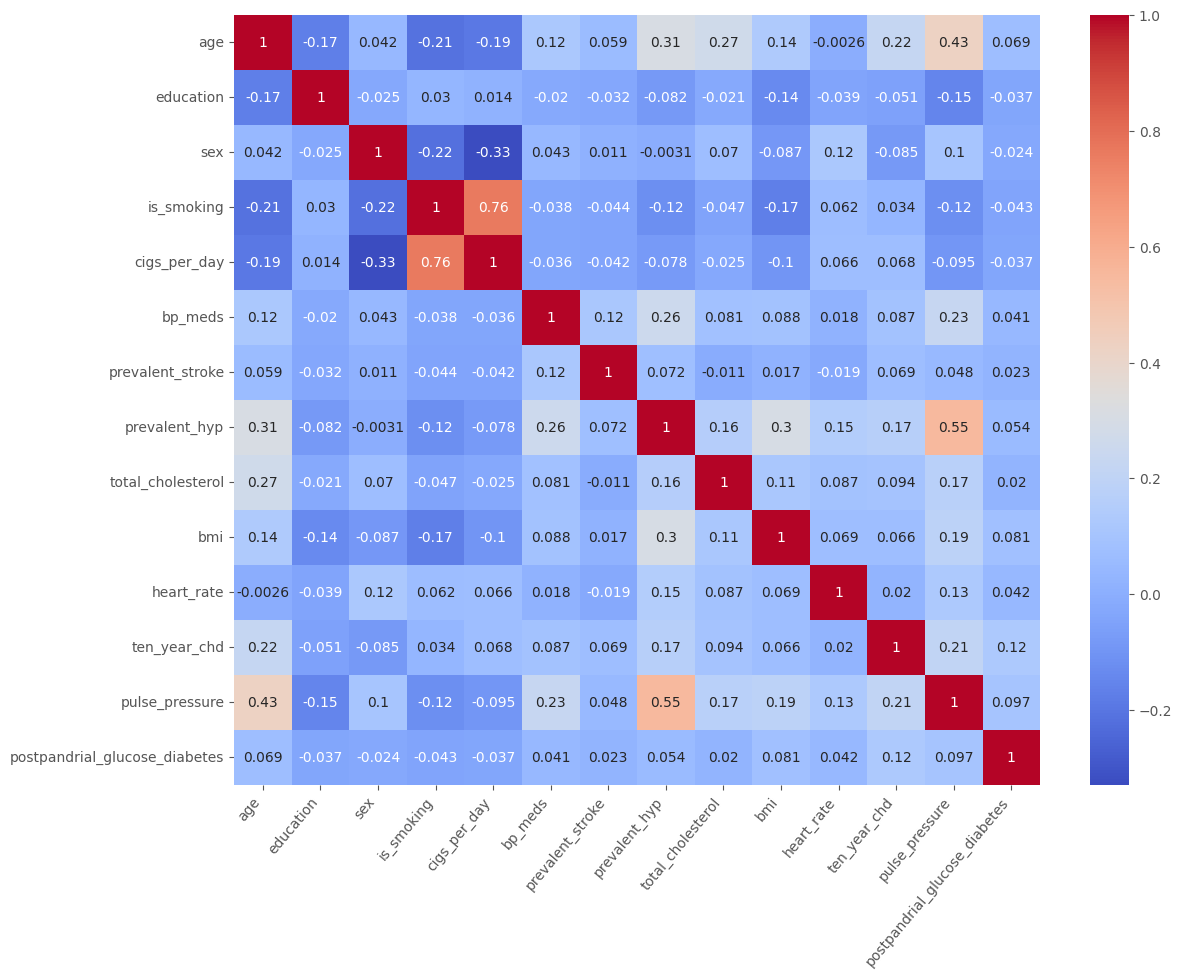

In [ ]:
# Select your features wisely to avoid overfitting
## Plotting Correlation Heatmap to see correlation b/w updated features and target variable.
plt.figure(figsize= (13,10))
corr = sns.heatmap(CHD_df1.corr(), annot = True, cmap='coolwarm')
corr.set_xticklabels(corr.get_xticklabels(),horizontalalignment='right',  rotation=50 )


In [ ]:
# Calculating the multicollinearity and initiating VIF(variance_Inflation_Factor) for Feature Selection.
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame(columns=['variables', 'VIF'])
    for i in range(X.shape[1]):
        vif.loc[i] = [X.columns[i], variance_inflation_factor(X.values, i)]
    return vif

In [ ]:
# Calculating vif, excluding the features that provide no information corresponds to target variable.
calc_vif(CHD_df1[[i for i in CHD_df1.describe().columns if i not in ['ten_year_chd']]])

,variables,VIF
0,age,38.516762
1,education,4.417739
2,sex,2.749642
3,is_smoking,4.828970
4,cigs_per_day,4.099349
5,bp_meds,1.130062
6,prevalent_stroke,1.026424
7,prevalent_hyp,2.110181
8,total_cholesterol,30.220738
9,bmi,33.790628


In [ ]:
# 'is_smoking' and 'cigs_per_day' are highly correlated, so dropping 'is_smoking' as it explains target variable less compare to 'cigs_per_day'
CHD_df1.drop(columns = (['is_smoking']) , inplace =True)

In [ ]:
calc_vif(CHD_df1[[i for i in CHD_df1.describe().columns if i not in ['ten_year_chd']]])

,variables,VIF
0,age,38.516621
1,education,4.407671
2,sex,2.743210
3,cigs_per_day,1.839646
4,bp_meds,1.130004
5,prevalent_stroke,1.026364
6,prevalent_hyp,2.096896
7,total_cholesterol,30.200451
8,bmi,33.702008
9,heart_rate,33.849414


In [ ]:
## Dropping the 'education' feature as it is negatively correlated to target variable and not giving sufficient information regarding heart disease.
CHD_df1.drop(columns = (['education']) , inplace =True)

In [ ]:
calc_vif(CHD_df1[[i for i in CHD_df1.describe().columns if i not in ['ten_year_chd']]])

,variables,VIF
0,age,38.512569
1,sex,2.743196
2,cigs_per_day,1.838865
3,bp_meds,1.129972
4,prevalent_stroke,1.026109
5,prevalent_hyp,2.084101
6,total_cholesterol,29.716146
7,bmi,33.551240
8,heart_rate,32.974262
9,pulse_pressure,19.884300


In [ ]:
# Dropping 'heart_rate' feature as of its high VIF as compare to other feature and low contribution towards target variable.
CHD_df1.drop(columns = (['heart_rate']) , inplace =True)

In [ ]:
calc_vif(CHD_df1[[i for i in CHD_df1.describe().columns if i not in ['ten_year_chd']]])

,variables,VIF
0,age,37.325445
1,sex,2.601578
2,cigs_per_day,1.728790
3,bp_meds,1.125920
4,prevalent_stroke,1.025918
5,prevalent_hyp,2.073670
6,total_cholesterol,28.131520
7,bmi,27.685098
8,pulse_pressure,19.607435
9,postpandrial_glucose_diabetes,1.026844


In [ ]:
# Dropping 'total_cholesterol' feature as of its high VIF  as compare to other feature and low contribution towards target variable.
CHD_df1.drop(columns = (['total_cholesterol']) , inplace =True)

In [ ]:
calc_vif(CHD_df1[[i for i in CHD_df1.describe().columns if i not in ['ten_year_chd']]])

,variables,VIF
0,age,30.297233
1,sex,2.536470
2,cigs_per_day,1.680030
3,bp_meds,1.125830
4,prevalent_stroke,1.024826
5,prevalent_hyp,2.062903
6,bmi,23.521505
7,pulse_pressure,19.519460
8,postpandrial_glucose_diabetes,1.026142


In [ ]:
# Dropping 'bmi' feature as of its high VIF  as compare to other feature and low contribution towards target variable
CHD_df1.drop(columns = (['bmi']) , inplace =True)


In [ ]:
calc_vif(CHD_df1[[i for i in CHD_df1.describe().columns if i not in ['ten_year_chd']]])

,variables,VIF
0,age,16.244271
1,sex,2.528634
2,cigs_per_day,1.636623
3,bp_meds,1.124009
4,prevalent_stroke,1.024546
5,prevalent_hyp,2.062803
6,pulse_pressure,18.802091
7,postpandrial_glucose_diabetes,1.025899


##### What all feature selection methods have you used  and why?

I have used correlation heatmap to see the relation between independent features and target variable. From the heatmap we have observed that age,bp_meds,prevalent_stroke,prevalent_hyp,pulse_pressure,cigs_per_day,postpandrial_glucose_diabetes are positively correlated to target variable and explaning the target variable very well.

In order to improve the performance of our model, I have utilized techniques such as the Filter method with correlation heatmap and VIF (variance inflation factor) to remove features that were not contributing significantly to the model's accuracy.We also addressed the issue of **multicollinearity** by selecting only those features that were highly explaining our target variable and having VIF as much as lowest possible.



##### Which all features you found important and why?

In [ ]:
CHD_df1.columns

Index(['age', 'sex', 'cigs_per_day', 'bp_meds', 'prevalent_stroke',
       'prevalent_hyp', 'ten_year_chd', 'pulse_pressure',
       'postpandrial_glucose_diabetes'],
      dtype='object')

These features I found important for our models because these features have positive correlation with our target variable and highly explaning our target variable compared to other feature. After evaluating VIF we choose all the features that had the VIF as lowest as possible for further analysis and modelling.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

As we have seen in Data Visualization that our dataset does not have normal distribution, so we need some of the transformations to make it approximately normal and for this reason we go with **log transformation** that helps in reducing  skewness and stabilizing the variance, making the data more suitable for modeling.

In [ ]:
# Transform Your data
## Log Transformation of the features(adding '1' to the below features to make the value defined at log zero).
CHD_df1['age']    = np.log10(CHD_df1['age']+1)
CHD_df1['sex']    = np.log10(CHD_df1['sex']+1)
CHD_df1['bp_meds']    = np.log10(CHD_df1['bp_meds']+1)
CHD_df1['prevalent_stroke']    = np.log10(CHD_df1['prevalent_stroke']+1)
CHD_df1['cigs_per_day']  = np.log10(CHD_df1['cigs_per_day']+1)
CHD_df1['prevalent_hyp']  = np.log10(CHD_df1['prevalent_hyp']+1)
CHD_df1['postpandrial_glucose_diabetes']    = np.log10(CHD_df1['postpandrial_glucose_diabetes']+1)
CHD_df1['pulse_pressure'] = np.log10(CHD_df1['pulse_pressure']+1)

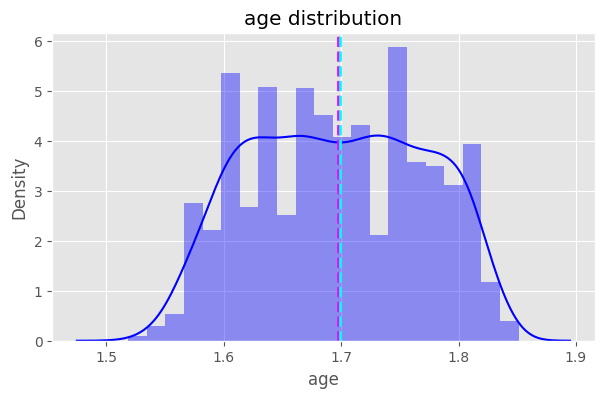

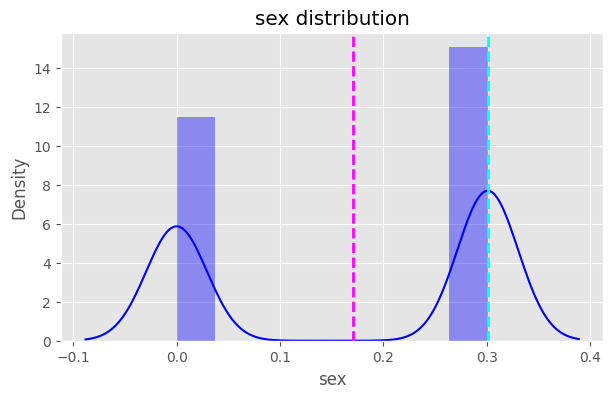

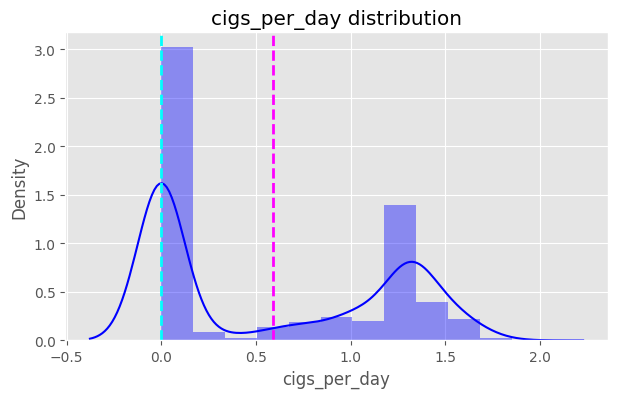

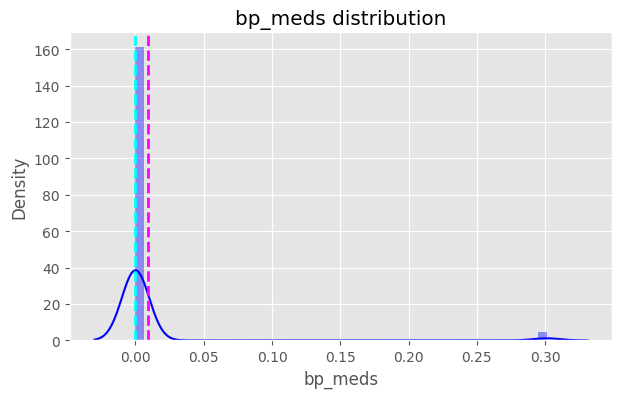

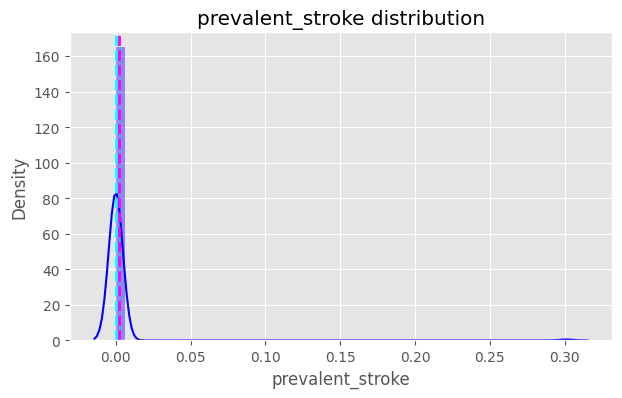

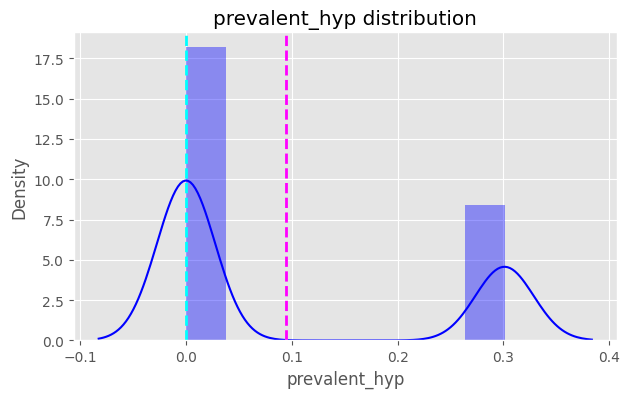

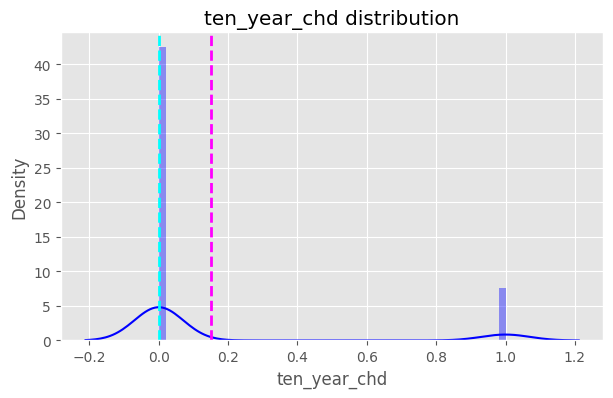

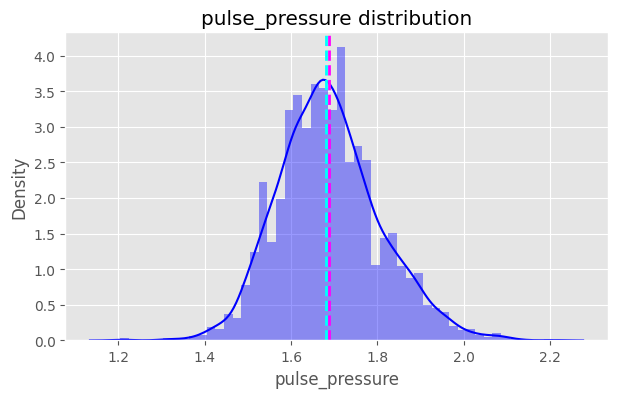

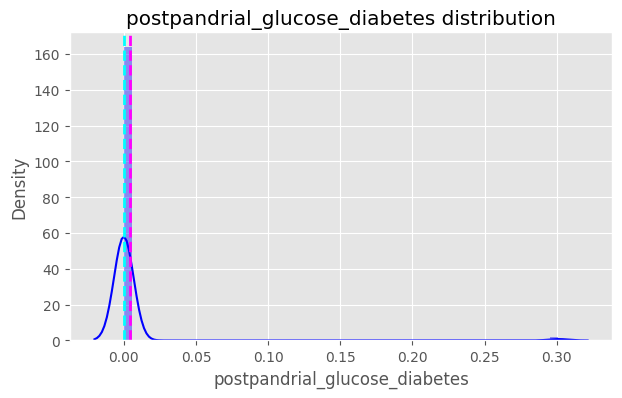

In [ ]:
## Plotting the log transformation.
for col in CHD_df1:
  plt.figure(figsize=(7,4))
  sns.distplot(CHD_df1[col], color="blue")
  plt.axvline(CHD_df1[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(CHD_df1[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

### 6. Data Splitting

In [ ]:
# # Creating the data of independent variables
y = CHD_df1['ten_year_chd']

# Create the dependent variable data
X = CHD_df1.drop(columns=['ten_year_chd'],axis=1).values

### 7. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

The dataset is imbalanced, which is expected since the number of individuals with a risk of cardiovascular disease is likely to be lower than those without. The target variable indicating the presence or absence of risk is binary, with a value of 1 indicating risk and 0 indicating no risk. This class imbalance can lead to biased results during model training and evaluation.

In [ ]:
# Handling Imbalanced Dataset (If needed)
print(CHD_df1['ten_year_chd'].value_counts())

0    2879
1     511
Name: ten_year_chd, dtype: int64


Text(0.5, 1.0, 'ten_year_chd')

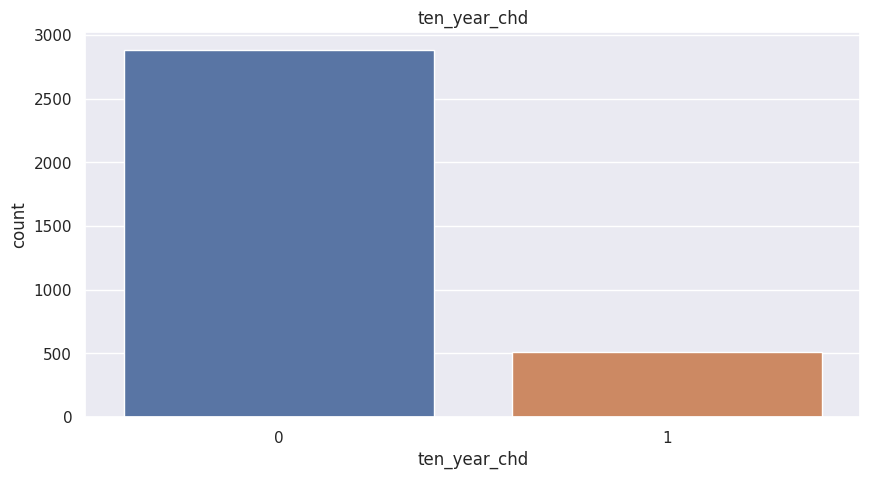

In [ ]:
# Plotting the distribution of class of target variable.
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x=CHD_df1['ten_year_chd'])
plt.title('ten_year_chd')

In [ ]:
## Using SMOTE(Synthetic Minority Oversampling Technique) to handle class Imbalance.
from imblearn.over_sampling import SMOTE

smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(CHD_df1))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


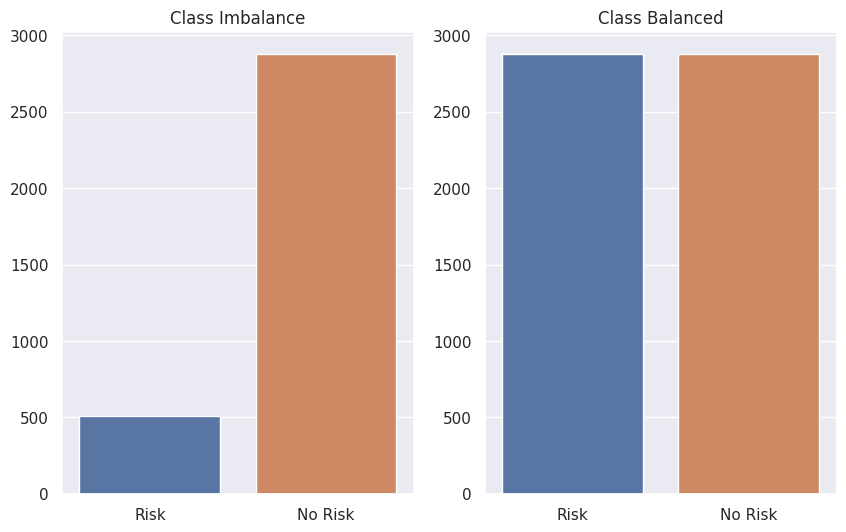

In [ ]:
from collections import Counter
labels = ["Risk","No Risk"]
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(dict(Counter(y)).values()))
plt.title("Class Imbalance")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=list(dict(Counter(y_smote)).values()))
plt.title("Class Balanced")
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used **SMOTE(Synthetic Minority Oversampling Technique)** to deal with the class Imbalance.

**SMOTE** is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

**Working Procedure:**

At first the total no. of oversampling observations, N is set up. Generally, it is selected such that the binary class distribution is 1:1. But that could be tuned down based on need. Then the iteration starts by first selecting a positive class instance at random. Next, the KNN’s (by default 5) for that instance is obtained. At last, N of these K instances is chosen to interpolate new synthetic instances. To do that, using any distance metric the difference in distance between the feature vector and its neighbors is calculated. Now, this difference is multiplied by any random value in (0,1] and is added to the previous feature vector.

**SMOTE** algorithm works in 4 simple steps:


* Choose a minority class as the input vector.
* Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function).
* Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor  
* Repeat the steps until data is balanced.





### 8. Splitting the data after balancing the dataset

In [ ]:
# First let's create our new dataset
df_new = pd.concat([pd.DataFrame(x_smote), pd.DataFrame(y_smote)], axis=1)
df_new.columns = ['age','sex', 'prevalent_stroke','cigs_per_day', 'bp_meds','prevalent_hyp', 'postpandrial_glucose_diabetes','pulse_pressure','ten_year_chd' ]
df_new.head()

,age,sex,prevalent_stroke,cigs_per_day,bp_meds,prevalent_hyp,postpandrial_glucose_diabetes,pulse_pressure,ten_year_chd
0,1.812913,0.30103,0.602060,0.0,0.0,0.00000,1.806180,0.0,1
1,1.568202,0.00000,0.000000,0.0,0.0,0.30103,1.851258,0.0,0
2,1.672098,0.30103,1.041393,0.0,0.0,0.00000,1.662758,0.0,0
3,1.707570,0.00000,1.322219,0.0,0.0,0.30103,1.851258,0.0,1
4,1.812913,0.30103,1.491362,0.0,0.0,0.00000,1.720159,0.0,0


In [ ]:
# Creating new independent and dependent variable.
X_new = df_new[['age','sex', 'prevalent_stroke','cigs_per_day', 'bp_meds','prevalent_hyp', 'postpandrial_glucose_diabetes','pulse_pressure']]
y_new = df_new['ten_year_chd']

In [ ]:
# Initiating Train-Test split.
X_train,X_test,Y_train,Y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=42)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 4606 records and Testing features have 1152 records.


##### What data splitting ratio have you used and why?

I have adopted a 80-20 data splitting ratio, allocating 80% of the data for training the model and reserving the remaining 20% for evaluating the model's performance. This ratio was chosen as it provides equal emphasis on both the training and testing datasets, promoting a balanced approach to model development and assessment.

### 9. Data Scaling

In [ ]:
# Initiating Scaling through Min-Max Scaler.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##### Which method have you used to scale your data and why?

 I have used the MinMaxScaler technique because it helps to adjust the range of the input data to a specified range (typically between 0 and 1), without altering the distribution of the data. It scales the data so that each feature falls within a specific range, which is beneficial for some machine learning algorithms. This method ensures that all input features have the same scale, which can be useful when training models that are sensitive to the scale of the input data.

## ***7. ML Model Implementation***

### ML Model - 1- Logistic Regression

In [ ]:
# ML Model - 1 Implementation
logistic_clf = LogisticRegression()
# Fit the Algorithm
logistic_clf.fit(X_train, Y_train)

# Predict on the model
y_pred = logistic_clf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Logistic regression is a popular statistical model used for binary classification problems. It is a generalized linear model that estimates the probability of an outcome belonging to a specific class based on input features.

The goal of logistic regression is to model the relationship between a set of independent variables (features) and a binary dependent variable (target). It assumes a linear relationship between the features and the log-odds (also known as the logit) of the target variable. The logit function is the inverse of the sigmoid function, which maps the log-odds to a probability between 0 and 1.

Mathematically, the logistic regression model can be represented as:

log(p / (1 - p)) = β0 + β1x1 + β2x2 + ... + βn*xn

where:



* p is the probability of the target variable being in the positive class.
* β0, β1, β2, ..., βn are the coefficients (parameters) of the model.
* x1, x2, ..., xn are the feature values.





In [ ]:
# Visualizing evaluation Metric Score chart
print('Train ROC-AUC score : ', logistic_clf.score(X_train,Y_train))
print('Test ROC-AUC score : ', logistic_clf.score(X_test,Y_test))

Train ROC-AUC score :  0.6710811984368216
Test ROC-AUC score :  0.6944444444444444


In [ ]:
## Accuracy of logistic Regression model
logistic_accuracy = accuracy_score(Y_test,y_pred)
print(f"Using logistic regression we get an accuracy of {round(logistic_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 69.44%


In [ ]:
# Classification Report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       589
           1       0.68      0.72      0.70       563

    accuracy                           0.69      1152
   macro avg       0.70      0.69      0.69      1152
weighted avg       0.70      0.69      0.69      1152



<Axes: >

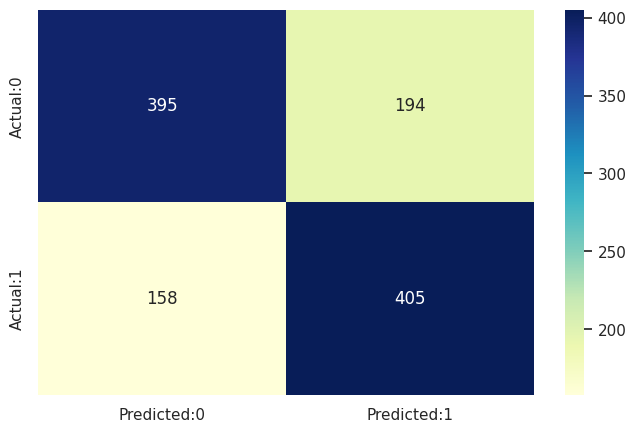

In [ ]:
# Confusion Matrix of logistic Regression Model
cm=confusion_matrix(Y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

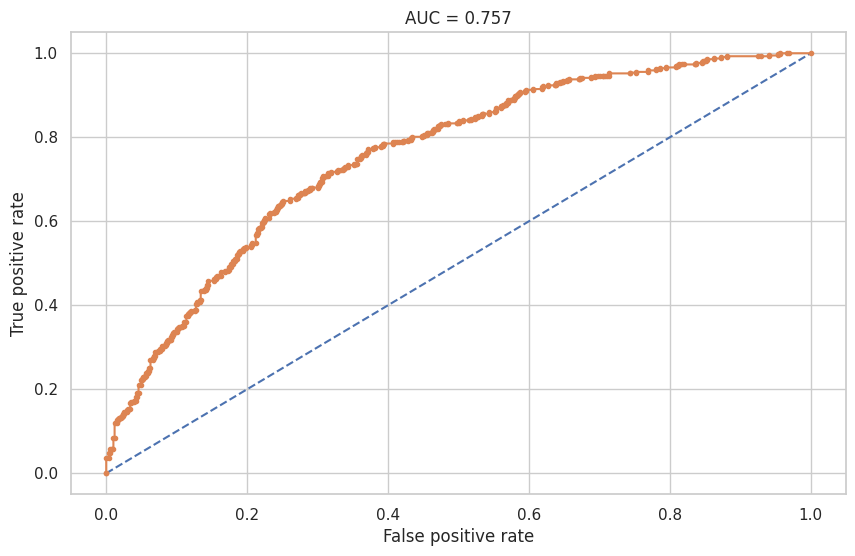

In [ ]:
# ROC curve and AUC
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(Y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

Logistic Regression act as a baseline model for binary classification to seperate the class by a linear boundary in a very effective manner. In our validation set there are 1152 patients and after implementing the model along with class division it shows there are 563 patients that are at risk of CHD but according to confusion matrix only 364(True positive) patients are predicted correctly amongst the total of 563 patients and 199( False negative) patients are predicted wrongly. Here our concern is to minimize the false negative(Increases Recall percentage) as much as possible to lower the risk of CHD among the patients that are actually prone to the risk of CHD and accuracy of model is not given the utmost priority. Our Model has the train roc_auc and test roc_auc score as 67.2% and 66.2% respectively with validation set has AUC= 73% and accuracy as 66%.

#### 2. Cross- Validation & Hyperparameter Tuning of Logistic Regression

Cross-validation with hyperparameter tuning refers to the process of combining cross-validation with the search for the optimal hyperparameters of a machine learning model. The advantage of using cross-validation with hyperparameter tuning is that it provides a more reliable estimate of the model's performance by evaluating different hyperparameter combinations on multiple folds of the data. It helps to avoid overfitting and ensures that the selected hyperparameters generalize well to unseen data.

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10, scoring='roc_auc')

In [ ]:
# Fit the Algorithm.
logistic_clf.fit(X_train,Y_train)

logistic_clf.best_params_

{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}

In [ ]:
# Predict on Model
logistic_predict = logistic_clf.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
print('Train ROC-AUC score : ', logistic_clf.best_estimator_.score(X_train,Y_train))
print('Test ROC-AUC score : ', logistic_clf.best_estimator_.score(X_test,Y_test))

Train ROC-AUC score :  0.6712983065566652
Test ROC-AUC score :  0.6987847222222222


In [ ]:
## Accuracy of logistic Regression model with CV and Hyperparameter tuning.
logistic_accuracy = accuracy_score(Y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(logistic_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 69.88%


In [ ]:
# Classification Report
print(classification_report(Y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       589
           1       0.68      0.72      0.70       563

    accuracy                           0.70      1152
   macro avg       0.70      0.70      0.70      1152
weighted avg       0.70      0.70      0.70      1152



<Axes: >

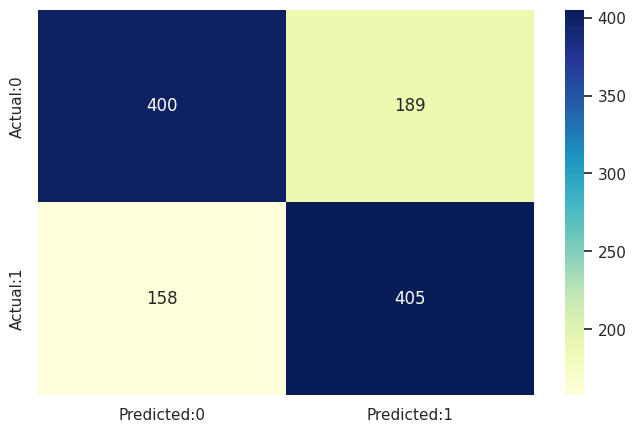

In [ ]:
# Confusion Matrix of logistic Regression Model after Hperparameter Tuning.
cm=confusion_matrix(Y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

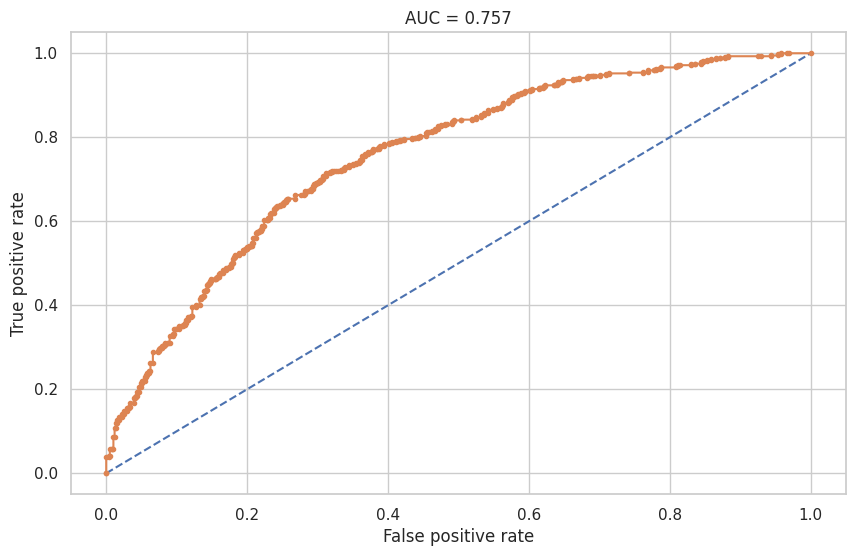

In [ ]:
# ROC curve and AUC after Hyperparameter Tuning.
probs1 = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
# calculate AUC
log_auc = roc_auc_score(Y_test, probs1)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs1)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique because it exhaustively searches all possible combinations of hyperparameters and returns the most optimal results.By evaluating the performance of each combination, GridSearchCV is able to select the best value for each hyperparameter, leading to more accurate model tuning. This approach provides a thorough and reliable method for optimizing hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After Hyperparameter tuning of Logistic Regression Model there is no significant improvement in model performance, it means that the default hyperparameters provided by the Logistic Regression are sufficient as well as optimized, and there is no need for further hyperparameter tuning.

Before hyperparameter tuning the train roc_auc and test roc_auc score as 67.2% and 66.2% respectively with validation set has AUC= 73% and accuracy as 66%.

After hyperparameter tuning  the train roc_auc and test roc_auc score as 67.3% and 66.3% respectively with validation set has AUC= 73% and accuracy as 66%.

*Logistic Regression Model behaves same as Before and After hyperparameter tuning with approximately same evaluation metrics.*

### ML Model - 2- Random Forest

In [ ]:
# ML Model - 2 Implementation
RFC = RandomForestClassifier()

# Set the hyperparameters
RFC.set_params(
    n_estimators=500,max_depth=3,n_jobs=-1,random_state=0
)
# Fit the Algorithm
RFC.fit(X_train, Y_train)

# Predict on the model
y_pred = RFC.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest is a popular machine learning algorithm that is commonly used for both classification and regression tasks. It is an ensemble learning method that combines multiple decision trees to make predictions.

**Working Principle:**

**Voting and Aggregation:** For classification tasks, each tree in the Random Forest predicts the class label of a sample. The final prediction is determined by majority voting, where the class label that is predicted by the majority of the trees is selected as the final prediction. For regression tasks, the predictions of all trees are averaged to obtain the final prediction.

In [ ]:
# Visualizing evaluation Metric Score chart
print('Train ROC-AUC score : ', RFC.score(X_train,Y_train))
print('Test ROC-AUC score : ',  RFC.score(X_test,Y_test))

Train ROC-AUC score :  0.6862787668258793
Test ROC-AUC score :  0.6814236111111112


In [ ]:
# Accuracy of Random Forest Model
random_accuracy = accuracy_score(Y_test,y_pred)
print(f"Using Random Forest we get an accuracy of {round(random_accuracy*100,2)}%")

Using Random Forest we get an accuracy of 68.14%


In [ ]:
# Classification Report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68       589
           1       0.67      0.69      0.68       563

    accuracy                           0.68      1152
   macro avg       0.68      0.68      0.68      1152
weighted avg       0.68      0.68      0.68      1152



<Axes: >

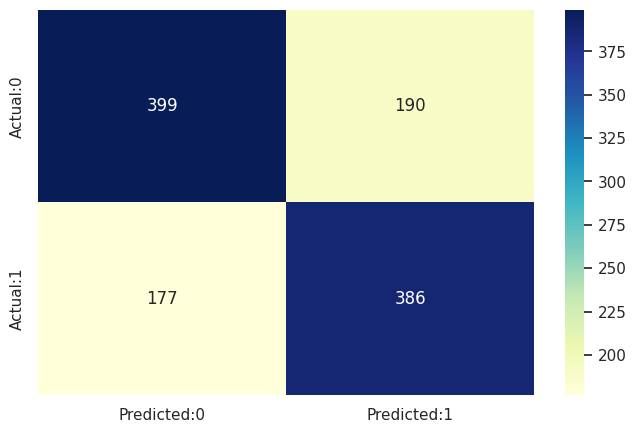

In [ ]:
# Confusion Matrix of Random Forest Model
cm=confusion_matrix(Y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

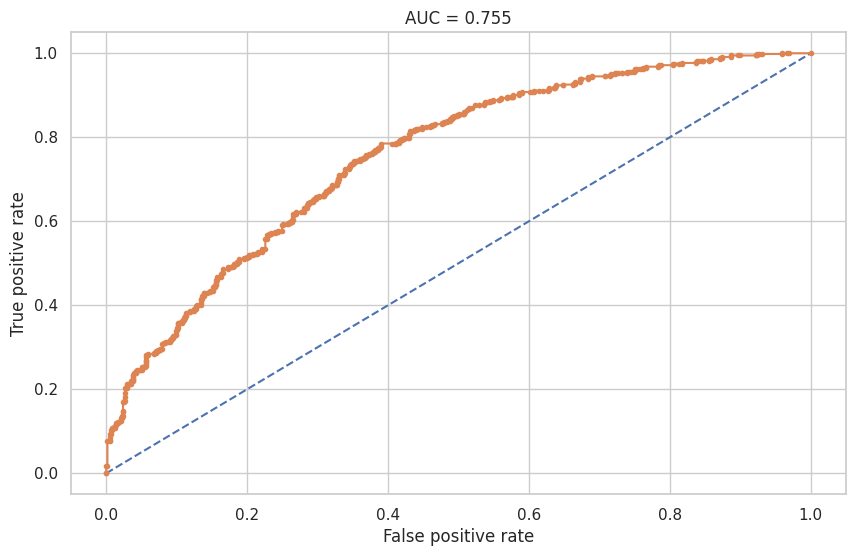

In [ ]:
#ROC curve and AUC
probs2 = RFC.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]
# calculate AUC
log_auc = roc_auc_score(Y_test, probs2)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs2)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

Random Forest(Untuned) shows a slight improvement as compare to logistic regression with train roc_auc and test roc_auc score as 69% and 67% respectively and validation set has AUC= 73.5% and accuracy= 67%.It also shows very little decrement in false negative as compare to logistic regression which means there is gradual improvement in recall.

#### 2. Cross- Validation & Hyperparameter Tuning of Random Forest

Cross-validation with hyperparameter tuning refers to the process of combining cross-validation with the search for the optimal hyperparameters of a machine learning model. The advantage of using cross-validation with hyperparameter tuning is that it provides a more reliable estimate of the model's performance by evaluating different hyperparameter combinations on multiple folds of the data. It helps to avoid overfitting and ensures that the selected hyperparameters generalize well to unseen data.

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# search for optimun parameters using gridsearch
params_rf = {
      'n_estimators':[150,250,300,350], 'max_depth':[7,8,10]
  }

random_clf = GridSearchCV(RandomForestClassifier(random_state=0),param_grid=params_rf,cv=5, scoring='roc_auc')

In [ ]:
# Fit the Alogorithm
random_clf.fit(X_train,Y_train)

random_clf.best_params_

{'max_depth': 10, 'n_estimators': 300}

In [ ]:
# Predict on the model
random_predict = random_clf.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
print('Train ROC-AUC score : ', random_clf.best_estimator_.score(X_train,Y_train))
print('Test ROC-AUC score : ',  random_clf.best_estimator_.score(X_test,Y_test))

Train ROC-AUC score :  0.8445505861919236
Test ROC-AUC score :  0.7760416666666666


In [ ]:
## Accuracy of Random Forest model with CV and Hyperparameter tuning.
RFC_accuracy = accuracy_score(Y_test,random_predict)
print(f"Using Random Forest with GridsearchCV we get an accuracy of {round(RFC_accuracy*100,2)}%")

Using Random Forest with GridsearchCV we get an accuracy of 77.6%


In [ ]:
# Classification Report after Hyperparameter Tuning.
print(classification_report(Y_test,random_predict))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       589
           1       0.76      0.79      0.77       563

    accuracy                           0.78      1152
   macro avg       0.78      0.78      0.78      1152
weighted avg       0.78      0.78      0.78      1152



<Axes: >

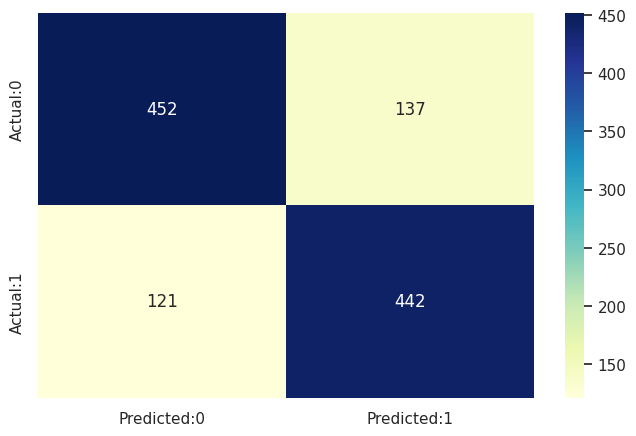

In [ ]:
# Confusion Matrix of Random Forest Model After Hyperparameter Tuning.
cm=confusion_matrix(Y_test,random_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

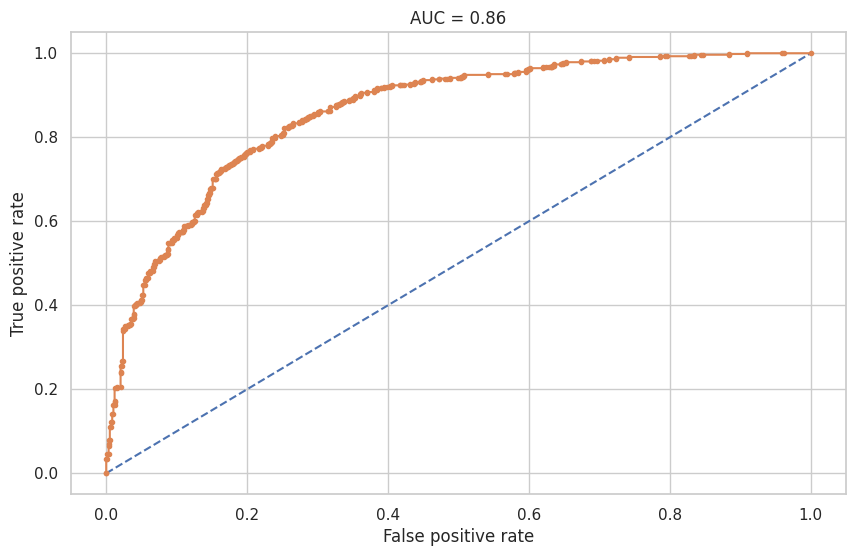

In [ ]:
#ROC curve and AUC after Hyperparameter Tuning.
probs3 = random_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs3 = probs3[:, 1]
# calculate AUC
log_auc = roc_auc_score(Y_test, probs3)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs3)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique because it exhaustively searches all possible combinations of hyperparameters and returns the most optimal results.By evaluating the performance of each combination, GridSearchCV is able to select the best value for each hyperparameter, leading to more accurate model tuning. This approach provides a thorough and reliable method for optimizing hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Hyperparameter tuning of Random forest has resulted in a significant improvement in the model's performance, with the number of wrongly predicted patients reduced to 135 in each class, indicating better prediction results. The recall and precision for class 1 has also increased from 0.67 to 0.76 and from 0.66 to 0.76  on the test set, which is a positive sign.

Furthermore, the accuracy and auc-roc of the model have improved to 77% and 84.5% respectively after the hyperparameter tuning of Random forest, with the best parameters identified as {'max_depth': 10, 'n_estimators': 300}.

*Precision and Recall become same after hyperparameter tuning but still our aim is to minimize false negative as much as possible by keeping the balance between the false positive and false negative trade off.*

### ML Model - 3- Support Vector Machine(SVM)

In [ ]:
# ML Model - 3 Implementation
SVM = SVC(kernel='linear', probability=True, random_state=0)
# Fit the Algorithm
SVM.fit(X_train, Y_train)

# Predict on the model
y_pred = SVM.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for both classification and regression tasks. It is particularly effective in solving complex problems with high-dimensional feature spaces.SVM can efficiently handle both linearly separable and nonlinearly separable data by applying the kernel trick.An SVM model is basically a representation of different classes in a hyperplane in multidimensional space. The hyperplane will be generated in an iterative manner by SVM so that the error can be minimized. The goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane (MMH).

*Support Vector Machine is the modification of Logistic Regression.*

In [ ]:
# Visualizing evaluation Metric Score chart
print('Train ROC-AUC score : ', SVM.score(X_train,Y_train))
print('Test ROC-AUC score : ',  SVM.score(X_test,Y_test))

Train ROC-AUC score :  0.6682587928788537
Test ROC-AUC score :  0.6901041666666666


In [ ]:
## Accuracy of Support Vector Machine model.
svm_accuracy = accuracy_score(Y_test,y_pred)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 69.01%


In [ ]:
# Classification Report.
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.65      0.68       589
           1       0.67      0.74      0.70       563

    accuracy                           0.69      1152
   macro avg       0.69      0.69      0.69      1152
weighted avg       0.69      0.69      0.69      1152



<Axes: >

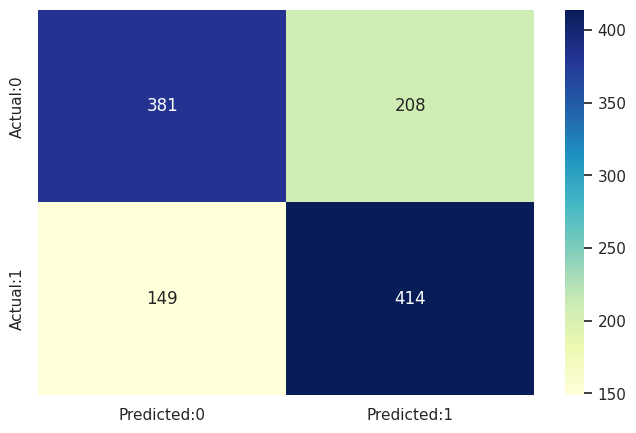

In [ ]:
# Confusion Matrix
cm=confusion_matrix(Y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

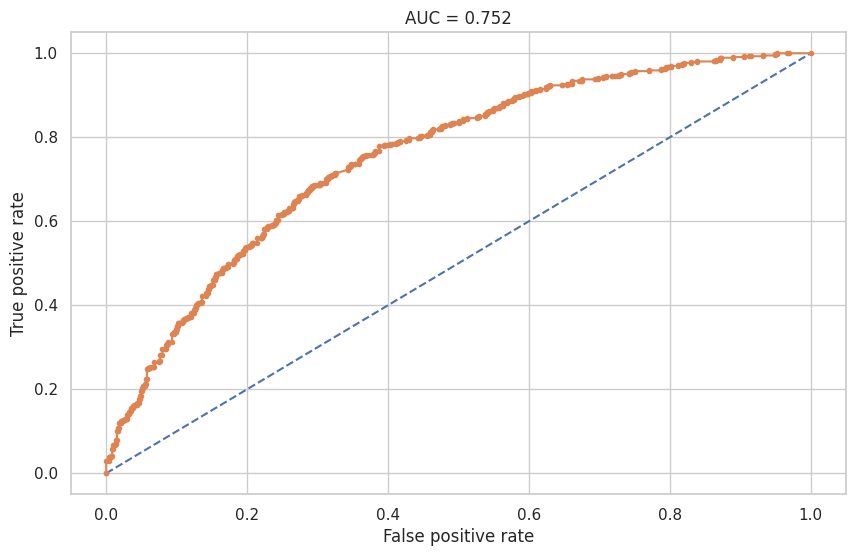

In [ ]:
#ROC curve and AUC
probs4 = SVM.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs4 = probs4[:, 1]
# calculate AUC
log_auc = roc_auc_score(Y_test, probs4)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs4)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

Support Vector Machine perform slightly well as compare to logistic regression but perform poor as compare to Random forest.As per our problem statment we need to minimize false negative as much as possible but SVM doesn't minimizes the false negative upto the extent we want, so we have to go with gridsearchCV to find how well SVM performs according to our need.

SVM gives the train roc_auc and test roc_auc as 67% and 66% respectively with validation set have AUC= 73% and accuracy= 66%.

#### 2. Cross- Validation & Hyperparameter Tuning of Support Vector Machine

Cross-validation with hyperparameter tuning refers to the process of combining cross-validation with the search for the optimal hyperparameters of a machine learning model. The advantage of using cross-validation with hyperparameter tuning is that it provides a more reliable estimate of the model's performance by evaluating different hyperparameter combinations on multiple folds of the data. It helps to avoid overfitting and ensures that the selected hyperparameters generalize well to unseen data.

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [ ]:
# fit the Algorithm.
svm_clf.fit(X_train,Y_train)

svm_clf.best_params_

{'C': 1, 'gamma': 0.1}

In [ ]:
# Predict on the model
svm_predict = svm_clf.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
print('Train ROC-AUC score : ', svm_clf.best_estimator_.score(X_train,Y_train))
print('Test ROC-AUC score : ', svm_clf.best_estimator_.score(X_test,Y_test))

Train ROC-AUC score :  0.6749891445940078
Test ROC-AUC score :  0.6927083333333334


In [ ]:
# Accuracy of Support Vector Machine Model with Hyperparameter Tuning.
svm_accuracy = accuracy_score(Y_test,svm_predict)
print(f"Using Support Vector Machine we get an accuracy of {round(svm_accuracy*100,2)}%")

Using Support Vector Machine we get an accuracy of 69.27%


In [ ]:
# Classification Report.
print(classification_report(Y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       589
           1       0.67      0.74      0.70       563

    accuracy                           0.69      1152
   macro avg       0.70      0.69      0.69      1152
weighted avg       0.70      0.69      0.69      1152



<Axes: >

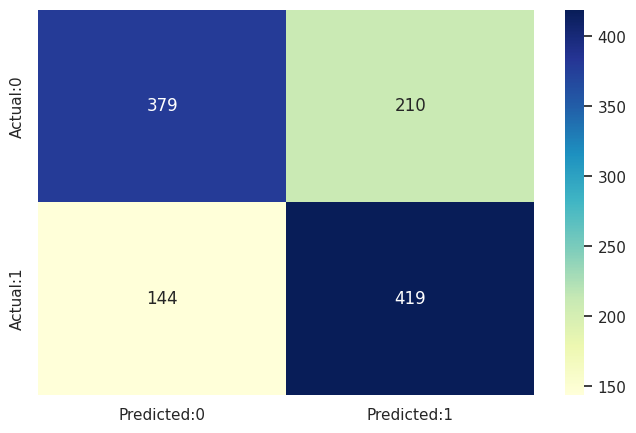

In [ ]:
# Confusion Matrix
cm=confusion_matrix(Y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

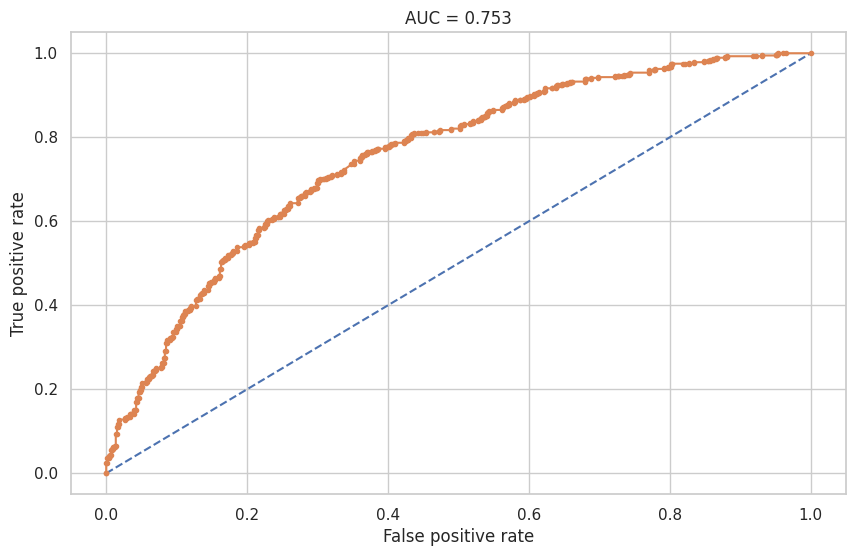

In [ ]:
#ROC curve and AUC after Hyperparameter Tuning.
probs5 = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs5 = probs5[:, 1]
# calculate AUC
log_auc = roc_auc_score(Y_test, probs5)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs5)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique because it exhaustively searches all possible combinations of hyperparameters and returns the most optimal results.By evaluating the performance of each combination, GridSearchCV is able to select the best value for each hyperparameter, leading to more accurate model tuning. This approach provides a thorough and reliable method for optimizing hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Hyperparameter tuning of Support Vector Machine increases the accuracy of model but still it doesn't perform well according to our problem statement as it increases the false negative which ultimately reject the patients having risk of CHD.

It performs well as per precision point of view and decreases the false positive upto a great extent that shows patients not having the risk of CHD are excluded.

Model has the the train roc_auc and test roc_auc as 69.4% and 68.4% respectively with validation set have AUC= 74.4 and accuracy= 69.7%.Precision and recall for class 1 of validation set is 0.69 and 0.63 respectively.

### ML Model - 4- XG BOOST

In [ ]:
# ML Model - 4 Implementation
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=300,max_depth=1,n_jobs=-1,random_state=0)
# Fit the model to your data
xgb.fit(X_train, Y_train)

# Predict on the test set
y_pred = xgb.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

XGBoost (eXtreme Gradient Boosting) is an advanced machine learning algorithm that belongs to the gradient boosting family. It is widely used for regression and classification tasks and has gained popularity for its high performance and scalability.The key idea behind XGBoost is to iteratively build an ensemble of weak prediction models, typically decision trees, and combine their predictions to create a strong predictive model. The algorithm optimizes a specific objective function by minimizing the loss during each boosting iteration.

*XGBoost is designed to be highly efficient and scalable, making it suitable for large datasets and complex problems.*

In [ ]:
# Visualizing evaluation Metric Score chart
print('Train ROC-AUC score : ', xgb.score(X_train,Y_train))
print('Test ROC-AUC score : ',  xgb.score(X_test,Y_test))

Train ROC-AUC score :  0.701476335214937
Test ROC-AUC score :  0.7135416666666666


In [ ]:
# Accuracy of XGBOOST model.
xgb_accuracy = accuracy_score(Y_test,y_pred)
print(f"Using XG BOOST we get an accuracy of {round(xgb_accuracy*100,2)}%")

Using XG BOOST we get an accuracy of 71.35%


In [ ]:
# Classification Report.
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.71       589
           1       0.69      0.76      0.72       563

    accuracy                           0.71      1152
   macro avg       0.72      0.71      0.71      1152
weighted avg       0.72      0.71      0.71      1152



<Axes: >

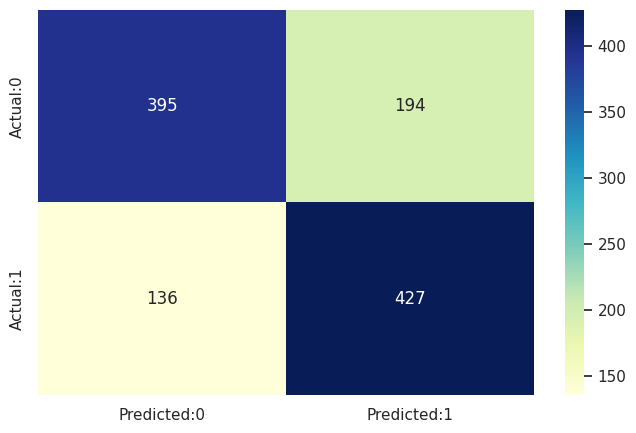

In [ ]:
# Confusion Matrix.
cm=confusion_matrix(Y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

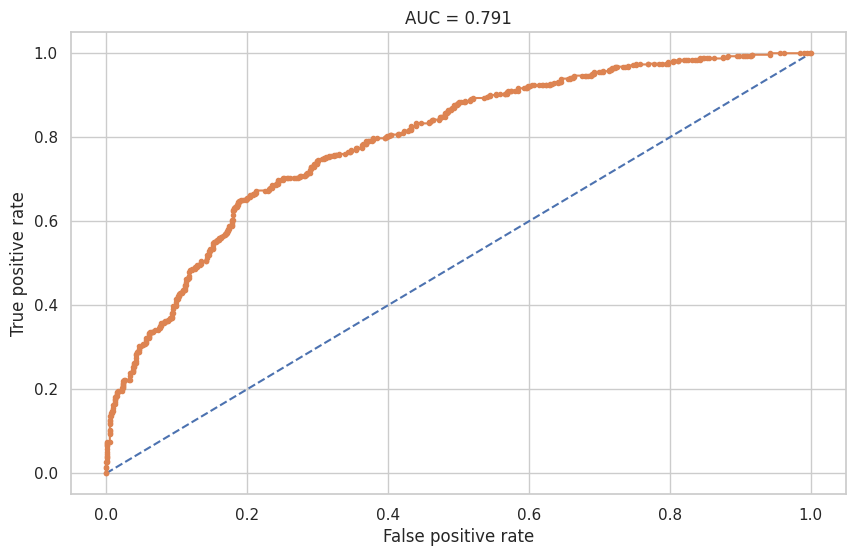

In [ ]:
#ROC curve and AUC.
probs6 = xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs6 = probs6[:, 1]
# calculate AUC
log_auc = roc_auc_score(Y_test, probs6)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs6)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

XGBOOST(Untuned) performs well as compare to logistic Regression,Random Forest(Untuned) and Support Vector Machine in terms of recall.The precision and recall for class 1 were 0.67 and 0.71 respectively, and for class 0, they were 0.71 and 0.67 respectively. The train roc_auc and test roc_auc score are 70% and 69% respectively with validation set as AUC= .772 and accuracy= 69% in identifying the infected patients, which indicates that the model's performance can be improved by hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning of XG BOOST

Cross-validation with hyperparameter tuning refers to the process of combining cross-validation with the search for the optimal hyperparameters of a machine learning model. The advantage of using cross-validation with hyperparameter tuning is that it provides a more reliable estimate of the model's performance by evaluating different hyperparameter combinations on multiple folds of the data. It helps to avoid overfitting and ensures that the selected hyperparameters generalize well to unseen data.

In [ ]:
 # ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from xgboost import XGBClassifier
params_xgb = {
     'max_depth': range (2, 12, 1),
    'n_estimators': range(60, 220, 10),
    'learning_rate': [0.1, 0.05, 0.01, 0.005]
  }

xgb_clf = GridSearchCV(XGBClassifier(), param_grid = params_xgb, cv = 10, scoring='roc_auc')

In [ ]:
xgb_clf.fit(X_train,Y_train)

xgb_clf.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 210}

In [ ]:
xgb_predict = xgb_clf.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
print('Train ROC-AUC score : ', xgb_clf.best_estimator_.score(X_train,Y_train))
print('Test ROC-AUC score : ',  xgb_clf.best_estimator_.score(X_test,Y_test))

Train ROC-AUC score :  0.9491966999565784
Test ROC-AUC score :  0.8836805555555556


In [ ]:
# Accuracy of XGBOOST model after Hyperparameter tuning.
xgb_accuracy = accuracy_score(Y_test,xgb_predict)
print(f"Using XG BOOST with GridsearchCV we get an accuracy of {round(xgb_accuracy*100,2)}%")

Using XG BOOST with GridsearchCV we get an accuracy of 88.37%


In [ ]:
# Classification Report.
print(classification_report(Y_test,xgb_predict))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       589
           1       0.91      0.85      0.88       563

    accuracy                           0.88      1152
   macro avg       0.89      0.88      0.88      1152
weighted avg       0.89      0.88      0.88      1152



<Axes: >

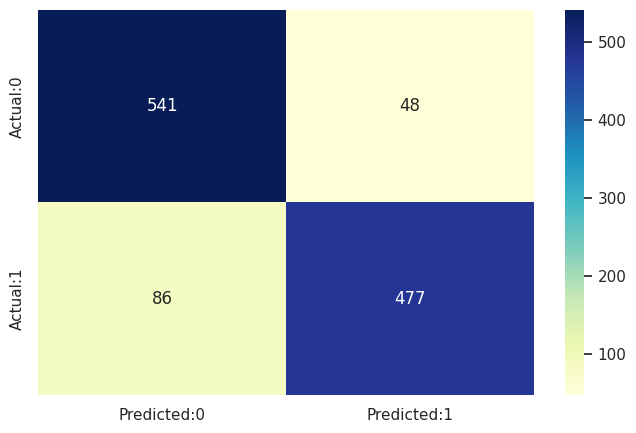

In [ ]:
cm=confusion_matrix(Y_test,xgb_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

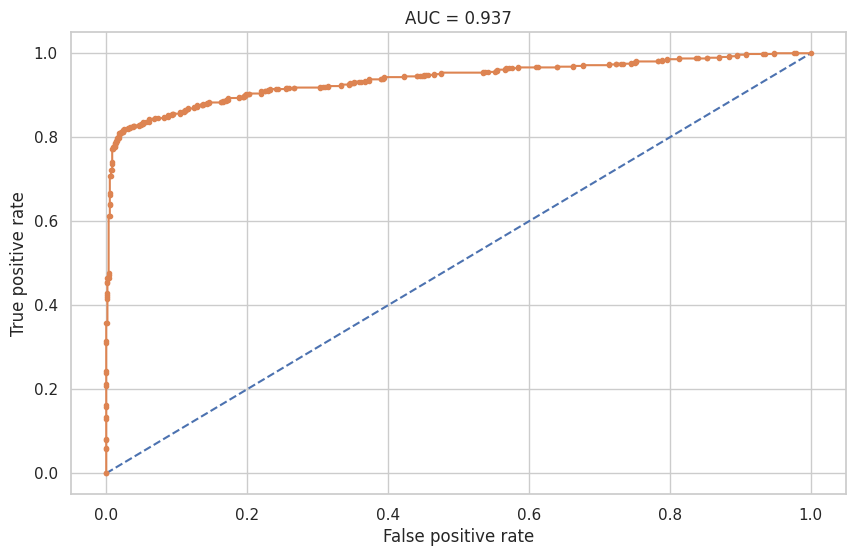

In [ ]:
#ROC curve and AUC after Hyperparameter Tuning.
probs7 = xgb_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs7 = probs7[:, 1]
# calculate AUC
log_auc = roc_auc_score(Y_test, probs7)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs7)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique because it exhaustively searches all possible combinations of hyperparameters and returns the most optimal results.By evaluating the performance of each combination, GridSearchCV is able to select the best value for each hyperparameter, leading to more accurate model tuning. This approach provides a thorough and reliable method for optimizing hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Hyperparameter tuning of XGBOOST has significantly improved the model performance and help to achieve  highest precision, recall, accuracy and F1-score for CHD prediction. The confusion matrix clearly shows that only 83 patients were wrongly predicted as 0 (FN) and 46 patients were wrongly predicted as 1 (FP), resulting in the highest precision and recall scores achieved so far creating a balance between false positive and false negative trade off.

Moreover, the F1-score of the majority and minority classes are 89% and 88%, respectively, which indicates that we have balanced the trade-off between precision and recall. This is because the F1-score is the harmonic mean of precision and recall. Thus, we can conclude that the hyperparameters tuning has significantly improved the model's predictive accuracy for CHD prediction.

Our model has been performing exceptionally well with an AUC-ROC curve covering 94% of the area, indicating that it is able to effectively distinguish between the negative and positive classes. After tuning the hyperparameters using GridSearchCV, we found the best parameters to be 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 170, which have contributed to this excellent performance.

### ML Model - 5- KNN

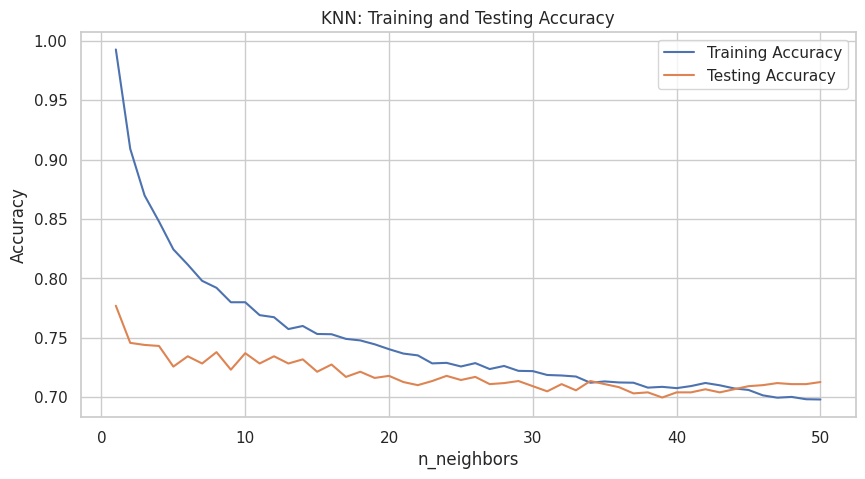

In [ ]:
# ML Model - 5 Implementation
# Define the range of n_neighbors values
n_neighbors_range = range(1, 51)

# Create empty lists to store the training and testing accuracy values
train_accuracy = []
test_accuracy = []

# Iterate over different n_neighbors values
for n_neighbors in n_neighbors_range:
    # Create an instance of KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Fit the model to the training data
    knn.fit(X_train, Y_train)

    # Predict on the training data
    train_pred = knn.predict(X_train)

    # Predict on the test data
    test_pred = knn.predict(X_test)

    # Calculate the training and testing accuracy
    train_acc = accuracy_score(Y_train, train_pred)
    test_acc = accuracy_score(Y_test, test_pred)

    # Append the accuracy values to the respective lists
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

# Plot the training and testing accuracy
plt.plot(n_neighbors_range, train_accuracy, label='Training Accuracy')
plt.plot(n_neighbors_range, test_accuracy, label='Testing Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('KNN: Training and Testing Accuracy')
plt.legend()
plt.show()

In [ ]:
# Create an instance of KNN Classifier
knn1 = KNeighborsClassifier(n_neighbors=9,p=2,metric='minkowski')

# Fit the model to your data
knn1.fit(X_train, Y_train)

# Predict on the test set
y_pred = knn1.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The K-Nearest Neighbors (KNN) algorithm is a simple and versatile supervised machine learning algorithm used for both classification and regression tasks. It is a non-parametric algorithm, meaning it does not make any assumptions about the underlying data distribution.

**Working Principle:**

**Voting or Weighted Voting:** For classification tasks, the KNN algorithm assigns a class label to the new data point based on the majority class among its K nearest neighbors. Each neighbor's vote has an equal weight (in the case of majority voting). In some variations of KNN, weights can be assigned based on the distance from the new data point.

**For Regression:** For regression tasks, the KNN algorithm predicts a continuous value for the new data point by taking the average or weighted average of the target variable among its K nearest neighbors.

In [ ]:
# Visualizing evaluation Metric Score chart
print('Train ROC-AUC score : ', knn1.score(X_train,Y_train))
print('Test ROC-AUC score : ',  knn1.score(X_test,Y_test))

Train ROC-AUC score :  0.7798523664785063
Test ROC-AUC score :  0.7230902777777778


In [ ]:
# Accuracy of KNN model.
KNN_accuracy = accuracy_score(Y_test,y_pred)
print(f"Using KNN we get an accuracy of {round(KNN_accuracy*100,2)}%")

Using KNN we get an accuracy of 72.31%


In [ ]:
# Classification Report.
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.63      0.70       589
           1       0.68      0.82      0.74       563

    accuracy                           0.72      1152
   macro avg       0.73      0.73      0.72      1152
weighted avg       0.73      0.72      0.72      1152



<Axes: >

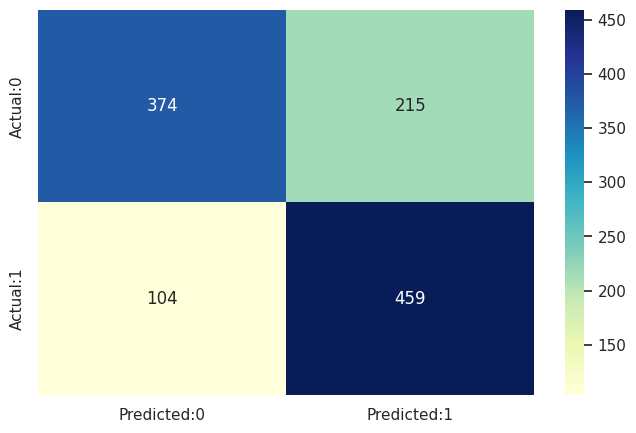

In [ ]:
# Confusion Matrix.
cm=confusion_matrix(Y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

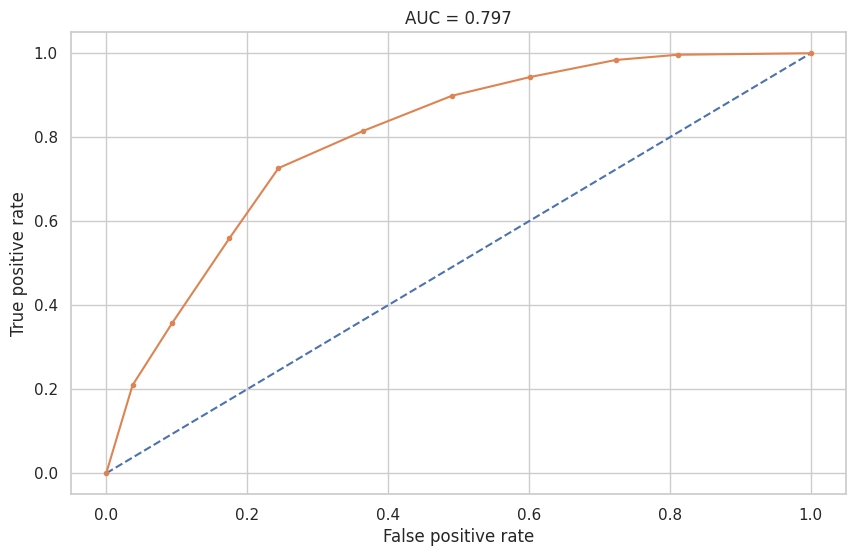

In [ ]:
#ROC curve and AUC.
probs8 = knn1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs8 = probs8[:, 1]
# calculate AUC
log_auc = roc_auc_score(Y_test, probs8)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs8)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

Model's classification report and confusion matrix reveals that KNN model precisely focus to increase recall but haven't create balance bwtween false positive and fasle negative tradeoff.Model evaluation metrics exhibits a high recall value of 0.79 for the minority class (1), but its prediction for class 0 is not as satisfactory (recall=0.65), leading to a lower F-1 score. Despite this, the AUC-ROC score of 79.4% indicates that our KNN model can effectively distinguish between positive and negative classes.

#### 2. Cross- Validation & Hyperparameter Tuning of KNN

Cross-validation with hyperparameter tuning refers to the process of combining cross-validation with the search for the optimal hyperparameters of a machine learning model. The advantage of using cross-validation with hyperparameter tuning is that it provides a more reliable estimate of the model's performance by evaluating different hyperparameter combinations on multiple folds of the data. It helps to avoid overfitting and ensures that the selected hyperparameters generalize well to unseen data.

In [ ]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# search for optimun parameters using gridsearch
params_knn = {'n_neighbors': [1, 2, 3, 5, 7, 8, 9, 11, 15, 17, 19, 21 ]}

knn_clf = GridSearchCV(KNeighborsClassifier(), param_grid = params_knn, cv = 10, scoring='roc_auc')

In [ ]:
# Fit the model
knn_clf.fit(X_train,Y_train)

knn_clf.best_params_

{'n_neighbors': 5}

In [ ]:
# Predict on test data.
knn_predict= knn_clf.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
print('Train ROC-AUC score : ', knn_clf.best_estimator_.score(X_train,Y_train))
print('Test ROC-AUC score : ',  knn_clf.best_estimator_.score(X_test,Y_test))

Train ROC-AUC score :  0.8243595310464611
Test ROC-AUC score :  0.7256944444444444


In [ ]:
# Accuracy of KNN model after Hyperparameter tuning.
knn_accuracy = accuracy_score(Y_test,knn_predict)
print(f"Using KNN with GridsearchCV we get an accuracy of {round(knn_accuracy*100,2)}%")

Using KNN with GridsearchCV we get an accuracy of 72.57%


In [ ]:
# Classification Report.
print(classification_report(Y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.79      0.62      0.70       589
           1       0.68      0.83      0.75       563

    accuracy                           0.73      1152
   macro avg       0.74      0.73      0.72      1152
weighted avg       0.74      0.73      0.72      1152



<Axes: >

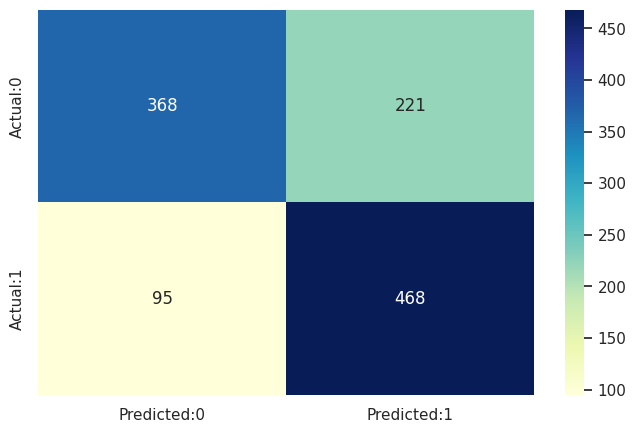

In [ ]:
# Confusion Matrix after HyperParameter Tuning.
cm=confusion_matrix(Y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

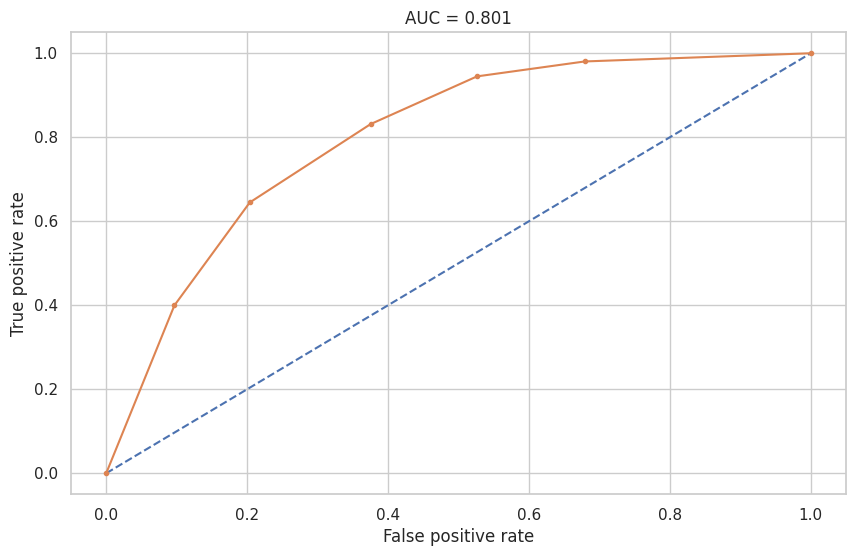

In [ ]:
#ROC curve and AUC after Hyper Parameter Tuning.
probs9 = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs9 = probs9[:, 1]
# calculate AUC
log_auc = roc_auc_score(Y_test, probs9)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs9)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique because it exhaustively searches all possible combinations of hyperparameters and returns the most optimal results.By evaluating the performance of each combination, GridSearchCV is able to select the best value for each hyperparameter, leading to more accurate model tuning. This approach provides a thorough and reliable method for optimizing hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After performing hyperparameter tuning using GridSearchCV, we were able to identify the optimal value for the number of neighbors in KNN as 5.Hyperparameter tuning improved the performance of model in context of recall which increases to 0.82 for class 1 and there is slight decrease in precision of class 1 from 0.68 to .67 which shows not a balance tradeoff between false positive and false negative.Though our aim is to maximize recall but not on the cost of too many false positive because abrupt surge in false positive can cause too many interventions and treatments in healthcare scenarios, so a balance tradeoff is also important to rectify this issue.

*AUC metric for KNN before and after hyperparameter tuning is approximately same.*

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In **healthcare**, accurate predictions can be a matter of life and death. In the case of predicting CHD, **false negatives** can be dangerous and lead to serious health consequences for patients. By focusing on **recall**, we ensure that our model is identifying as many positive cases as possible, reducing the risk of false negatives.

Additionally, **F-1 score** provides a balance between **precision and recall**, ensuring that our model is accurately predicting both positive and negative cases. This helps in making informed decisions and reducing the risks associated with CHD. Ultimately, by maximizing recall and F-1 score, we can provide better healthcare outcomes for patients and potentially save lives.

In a **healthcare business** context, the metrics of **recall and F1 score** are important because they help to evaluate the performance of a model in predicting the likelihood of a patient having a particular disease, in this case, **CHD**. **High recall** ensures that the model is able to identify most of the actual positive cases (patients with CHD) and reduce the chances of falsely negative predictions which can lead to negative outcomes for the patients.

Similarly, **F1 score** is important because it takes into account both **precision and recall**, making it a good metric to evaluate the **trade-off** between these two measures. This is particularly important for businesses where false positives (healthy patients being predicted as infected) can have serious consequences, such as unnecessary treatments or medications.

Overall, by optimizing these metrics, businesses can ensure that they are providing positive, accurate and reliable predictions to healthcare professionals, which can ultimately lead to better patient outcomes, increased customer satisfaction, and improved business performance.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After evaluation of each and every model I choose to go with **XGBOOST(Hyperparamater tuned model)** as our targert problem(To predict the ten year risk of CHD) required **high recall** and balance between false positive and false negative trade off with good **F1 score.**

Our model has successfully achieved the requirements with highest recall and precision among all the model[i.e. recall=85% and precision = 91% for class 1] with F1 score of 88% showing balance between precision and recall.Model also gains AUC-ROC score of 94% which means our model has very discriminative power to distinguish between both the classes.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost (eXtreme Gradient Boosting)  combines the power of multiple simple models, such as decision trees, to create a masterful and accurate prediction model. It's the perfect tool for tackling large datasets and can train a sequence of models that learn from each other's mistakes. In other words, XGBoost is a true master of boosting, where each tree is trained to correct the errors of the previous trees and create a more accurate and robust model.

XGBoost is the wizard of the machine learning world, harnessing the power of gradient boosting to optimize tree parameters and minimize loss. But that's not all - XGBoost also comes packed with some pretty nifty features, including regularization to protect against overfitting, and parallel processing to speed up the training process.

In [ ]:
# Fit the XGBOOST model.
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

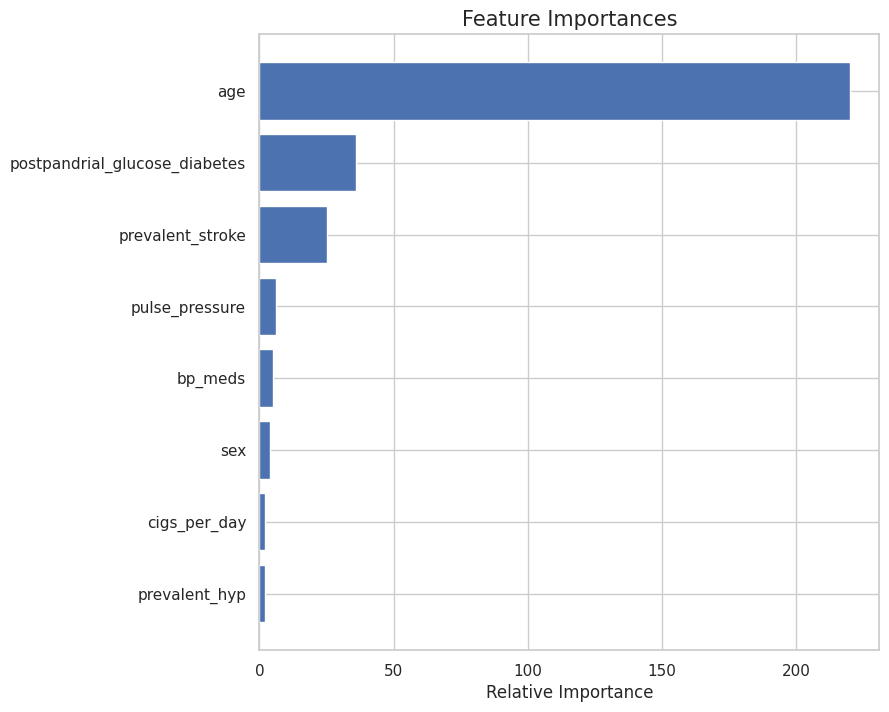

In [ ]:
# Define the feature importances and sort them in ascending order.
# Get the feature importances using the XGBoost Booster object.
importance_dict = xgb.get_booster().get_score(importance_type='weight')

# Sort the feature importances in descending order
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the feature indices and importances
feature_indices, importances = zip(*sorted_importances)

# Map the feature indices to their names from df_new
feature_names = [df_new.columns[int(idx[1:])] for idx in feature_indices]

# Set the figure size and title
plt.figure(figsize=(8, 8))
plt.title('Feature Importances', fontsize=15)

# Create the horizontal bar chart
plt.barh(range(len(importances)), importances, align='center', zorder=2)

# Set the y-axis tick labels to the feature names and invert the y-axis
plt.yticks(range(len(importances)), feature_names)
plt.gca().invert_yaxis()

# Set the x-axis label and enable grid lines
plt.xlabel('Relative Importance')
plt.grid(axis='x', zorder=0)

# Show the plot
plt.show()

Although XGBoost has emerged as the champion of accuracy in our model selection process, we cannot ignore the fact that it is often considered a "black box" due to its complex nature. Our stakeholders, who are keen on understanding the underlying reasoning behind the model's predictions, would not be satisfied with a mere numerical accuracy metric. Therefore, in order to foster their trust and provide them with a more transparent and insightful interpretation of the model's behavior, we have crafted a visually-appealing bar plot showcasing the decreasing sequence of feature importance. By doing so, we hope to empower our stakeholders with a deeper understanding of the model's decision-making process and the key factors that influence its predictions.

**Feature 'age', 'postpandrial_glucose_diabetes',and 'prevalent_stroke' are the most influential feature, making our model the best model(XGBOOST) by enhancing model performance and its predictions.**

# **Conclusion**

**Insights From Exploratory Data Analysis:**



* **There is a 15.1% probability that individuals may develop coronary heart diseases within a decade.**
* **The likelihood of developing coronary heart diseases escalates with age, precisely with age group(50-63)yrs. are at a higher risk of experiencing heart ailments. Additionally, there exists a positive correlation between systolic blood pressure (sysBP) and diastolic blood pressure (diaBP).**  
* **Individuals with a history of stroke, bp medication, hypertension, and diabetes are more susceptible to developing coronary heart disease.**  
*  **Out of total males 18%(264) are prone to risk of coronary heart disease as compare to female which is 12%(230) out of total females and the reason behind this is males are habitual smokers as compare to females.**
* **In terms of predicting the likelihood of coronary heart disease, heart rate is the most critical feature, followed by total cholesterol (totChol) and glucose.**


**Conclusion Drawn From ML Models:**

* **I have implemented a total of five classification machine learning models in our analysis, which are Logistic Regression, Random Forest, XGBoost,  K-Nearest Neighbors (KNN), and Support Vector Machine (SVM).**
* **Recall has been chosen as the model evaluation metric because it is crucial to minimize false negatives according to our target problem .**
* **After evaluating various metrics such as recall, precision, F1 score, accuracy, and AUC-ROC, XGBoost has been considered as our final optimal model since it achieved the highest scores for all these metrics.**
* **During our analysis, the optimal parameters for XGBoost(GridsearchCV) were determined to be a learning rate of 0.1, a maximum depth of 7, and 170 estimators. These parameters were found to provide the best results in terms of accuracy, precision, recall, F1 score, and AUC-ROC.**
* **According to our analysis, age, postprandial_glucose_diabetes, prevalent stroke are the most significant contributing features towards making predictions for our selected model.**
* **Out of the 1152 patients, there are 563 patients(class 1) who are at a risk of coronary heat disease and 589(class 0) patients doesn't have risk of coronary heart disease, our optimal model correctly predicted 543 patients with class 0 and 480 patients with class 1. However, there were 83 false negatives (FN) and 46 false positives (FP) cases.**
* **During our analysis, no overfitting was observed in any of the models. This indicates that the models were able to generalize well to new, unseen data, and were not solely relying on the training data to make accurate predictions. This is an important aspect of model evaluation, as overfitting can lead to poor performance on new data and limit the model's ability to be useful in real-world scenarios.**
















### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***